# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import metrics

from numpy import sqrt
from numpy import argmax

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


import time

from uszipcode import SearchEngine

## Loading the dataset

In [3]:
Loan_Data = pd.read_csv("Loan_Modelling.csv") 


## Data Overview

* Observations
* Sanity checks

In [4]:
# Review columns and data types
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Generate descriptive stats on the data set
Loan_Data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Observations
- I see some negative values inthe experience column, probably will need to set these to 0, but we might drop the experience column later on as well.

In [6]:
# Provide a view of the count of rowns and columns in the dat set.
print("The data set has " + str(Loan_Data.shape[0]) + " columns and " + str(Loan_Data.shape[1]) + " rows.")

The data set has 5000 columns and 14 rows.


In [7]:
# Get top 5 rows
Loan_Data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Observations 
- We can see that we will need to remove the ID column as it is not useful in our analysis.

In [8]:
# Identify if we have any missing data
Loan_Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations 
- We can see there is not any missing data.

## Data Preprocessing 1st iteration
- Already checked for missing data
- We will manage zipcode categorizing and also create county, city and state


In [9]:
# Drop the ID column before we start the next analysis
Loan_Data.drop(columns=['ID'], inplace=True)


In [10]:
#create the search engine
search = SearchEngine()

cityArray = []
stateArray = []
countyArray = []
def getCity(z):
    return search.by_zipcode(zip).city
def getCounty(z):
    return search.by_zipcode(zip).county
def getState(z):
    return search.by_zipcode(zip).state

#Loop through zipcodes and set state
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    try:
        cityArray.append(getCity(zip))
    except Exception as e: 
        cityArray.append(np.nan)
    try:
        countyArray.append(getCounty(zip))
    except Exception as e: 
        countyArray.append(np.nan)
    try:
        stateArray.append(getState(zip))
    except Exception as e: 
        stateArray.append(np.nan)
    continue

Loan_Data['City'] = cityArray
Loan_Data['County'] = countyArray
Loan_Data['State'] = stateArray
Loan_Data.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County,State
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County,CA
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County,CA
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County,CA
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County,CA
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County,CA
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego,San Diego County,CA
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Claremont,Los Angeles County,CA
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey,Monterey County,CA
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles,Los Angeles County,CA
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Ojai,Ventura County,CA


#### Observations
- All of the data is coming form a single state. In this case California. We will not need to keep the state column in this case either, it will be removed later on.

In [11]:
Loan_Data['City'].unique()

array(['Pasadena', 'Los Angeles', 'Berkeley', 'San Francisco',
       'Northridge', 'San Diego', 'Claremont', 'Monterey', 'Ojai',
       'Redondo Beach', 'Santa Barbara', 'Belvedere Tiburon', 'Glendora',
       'Santa Clara', 'Capitola', 'Stanford', 'Studio City', 'Daly City',
       'Newbury Park', 'Arcata', 'Santa Cruz', 'Fremont', 'Richmond',
       'Mountain View', 'Huntington Beach', 'Sacramento', 'San Clemente',
       'Davis', 'Redwood City', 'Cupertino', 'Santa Clarita', 'Roseville',
       'Redlands', 'La Jolla', 'Brisbane', 'El Segundo', 'Los Altos',
       'Santa Monica', 'San Luis Obispo', 'Pleasant Hill',
       'Thousand Oaks', 'Rancho Cordova', 'San Jose', 'Reseda', 'Salinas',
       'Cardiff By The Sea', 'Oakland', 'San Rafael', 'Banning',
       'Bakersfield', 'Riverside', 'Rancho Cucamonga', 'Alameda',
       'Palo Alto', 'Livermore', 'Irvine', 'South San Francisco',
       'Emeryville', 'Ridgecrest', nan, 'Hayward', 'San Gabriel',
       'Santa Ana', 'Loma Linda', 'E

In [12]:
Loan_Data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', nan,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [13]:
Loan_Data.isna().sum()

Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  34
County                34
State                 34
dtype: int64

Observation: We have missing data that needs to be managed now that we did not find using the lookup. 

In [14]:
# Identify the missing zip codes 
missingZips = Loan_Data[Loan_Data['State'].isnull()]

In [15]:
#look a the counts in each zip
missingZips['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

### missing zips
- 3 of the missing zips are from california by simply googling
- 1 is from washington dc
- We will manually code these in the data



In [16]:
# Make updates to eahc state, city and county manually for the zipcodes that did not match
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    if zip == 92717:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 96651:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 92634:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "Los Angeles"
        Loan_Data["County"].iloc[i] = "Los Angeles County"
    if zip == 93077:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"

In [17]:
#check missing vvalues for state one more time
Loan_Data.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
State                 0
dtype: int64

All missing data dealt with.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [18]:
# Setup reusable plot functions

# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature,yLabel, xLabel, title, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    bp = sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    hp = sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", 
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    bp.set(title=title)
    hp.set(ylabel=yLabel,
        xlabel=xLabel)

# function to create labeled barplots


def labeled_barplot(data, feature,yLabel, xLabel, title, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    ax.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

def hist_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn box plot
    hp = sns.histplot(data=Loan_Data, x=x)

    #specify axis labels
    hp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

def box_plot(x, y, yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn box plot
    hp = sns.boxplot(x=x,y=y,data=Loan_Data)

    #specify axis labels
    hp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()


def count_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn countplot
    cp = sns.countplot(data=Loan_Data, x=x)
    #specify axis labels
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

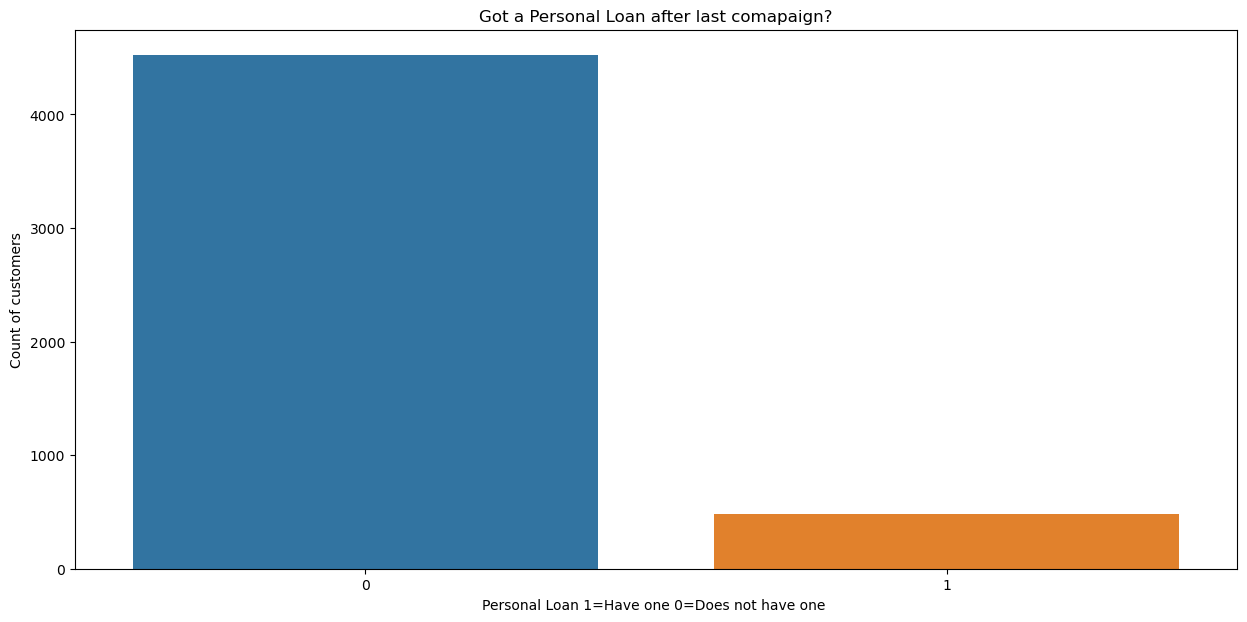

In [19]:
# Count plot to see how many  personal loan takers we have versus non
count_plot(Loan_Data['Personal_Loan'],'Count of customers', 'Personal Loan 1=Have one 0=Does not have one ','Got a Personal Loan after last comapaign?')

#### Oberservations
- Overall a small proportion of the customers got a personal loan in the last campaign, a little less than 500 customers.

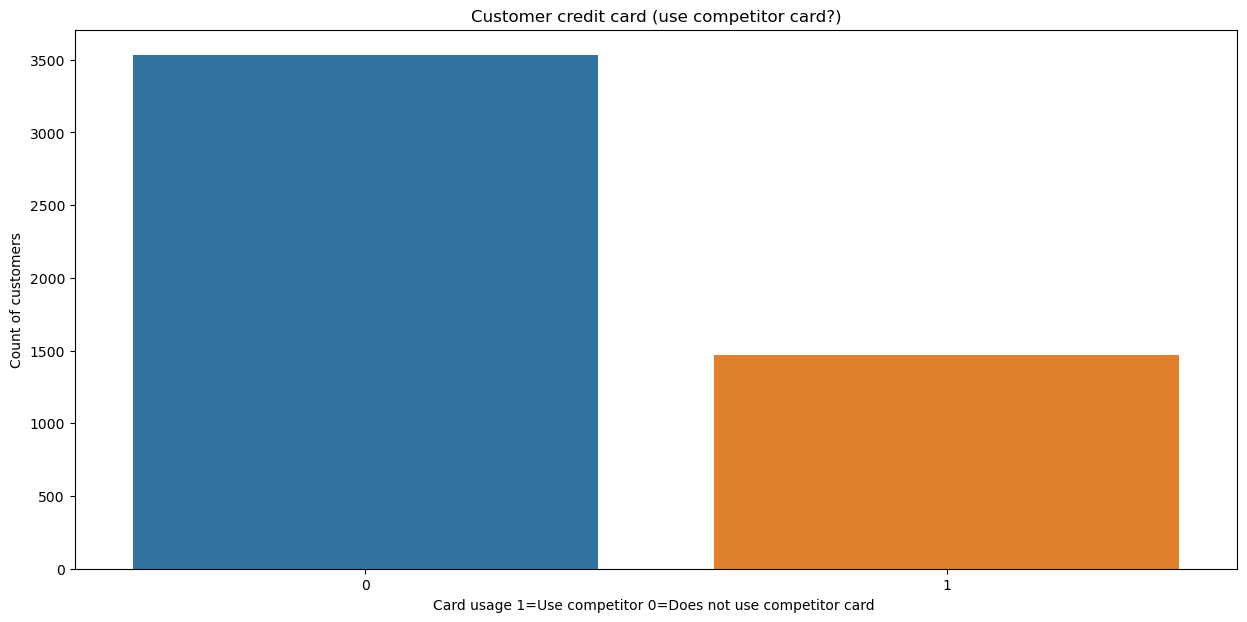

In [20]:
# Count plot to see credit carf distribution
count_plot(Loan_Data['CreditCard'],'Count of customers', 'Card usage 1=Use competitor 0=Does not use competitor card ','Customer credit card (use competitor card?)')

### Observations
- Can see that we have 3500 customers that use another banks credit card and 1500 that do not.

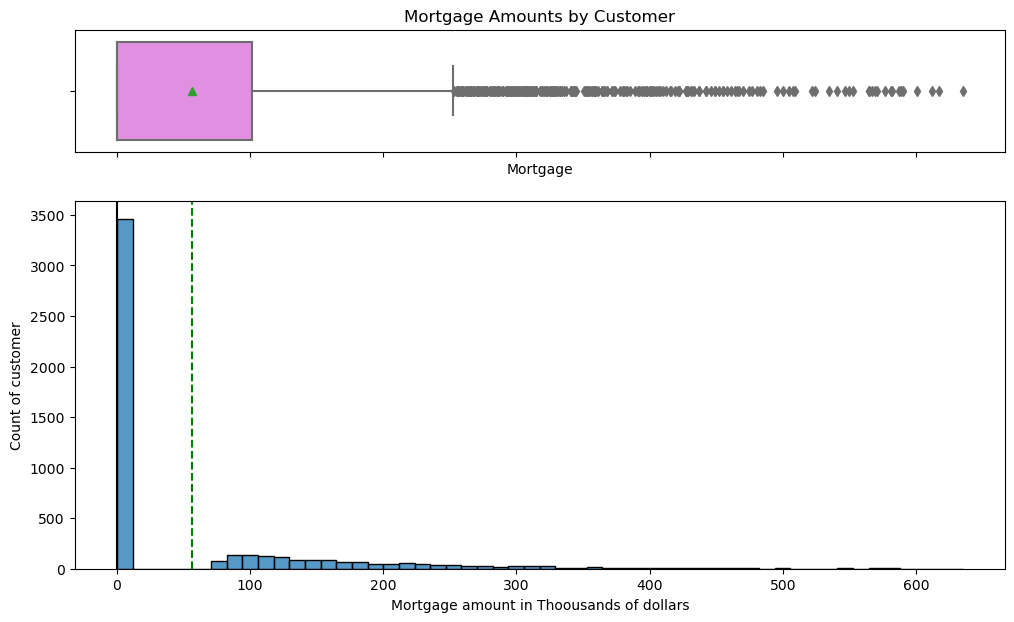

In [21]:
# Mortgage plots
histogram_boxplot(Loan_Data, 'Mortgage','Count of customer','Mortgage amount in Thoousands of dollars','Mortgage Amounts by Customer')

### Observations
- There are a lot customers that do not have a mortgage in the dataset, I am assuming 0 in the data means they do not have a mortgage. About 3500.
- The data is heavily right skewed
- There are many outliers in the data set as shown in the box plot

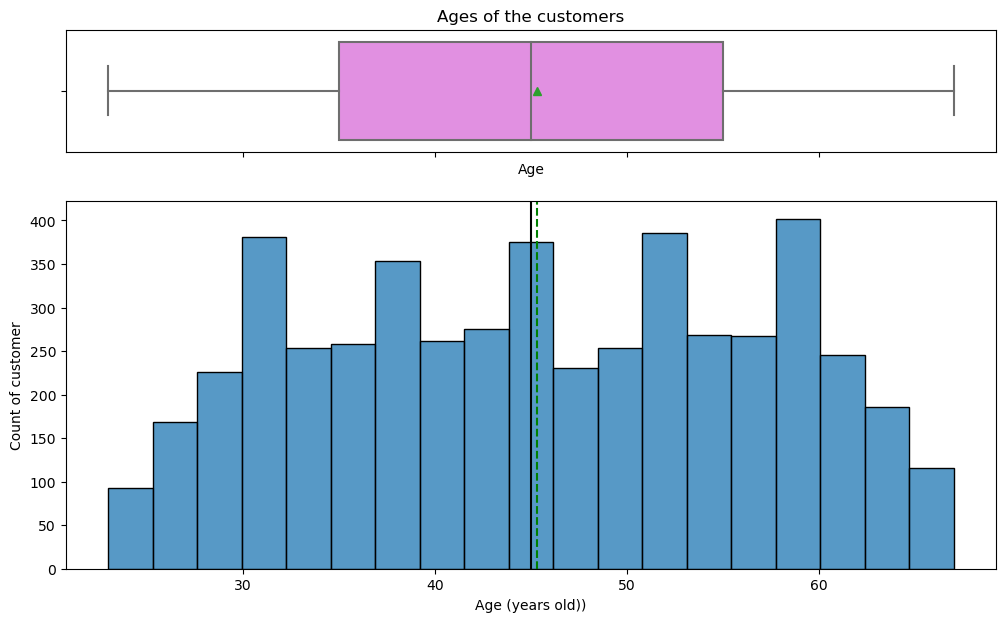

In [22]:
# Age plots
histogram_boxplot(Loan_Data, 'Age','Count of customer','Age (years old))','Ages of the customers')

### Observations
- Average age of the customers is about 45 years old
- Age is pretty evently distributed with some spikes in certain age categories above and below 45 in the data.
- There are no outliers in the data set as shown in the box plot

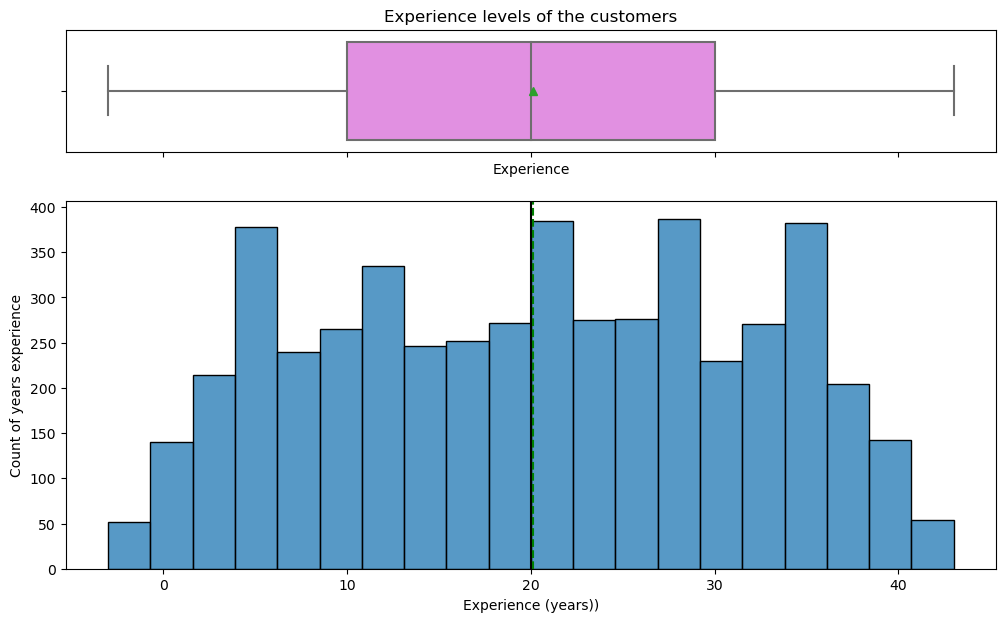

In [23]:
# Experience plots
histogram_boxplot(Loan_Data, 'Experience','Count of years experience','Experience (years))','Experience levels of the customers')

### Observations
- Average professional experience level is 20 years.
- Experience is pretty evently distributed with some spikes in certain experience levels above and below 20 in the data.
- There are no outliers in the data set as shown in the box plot

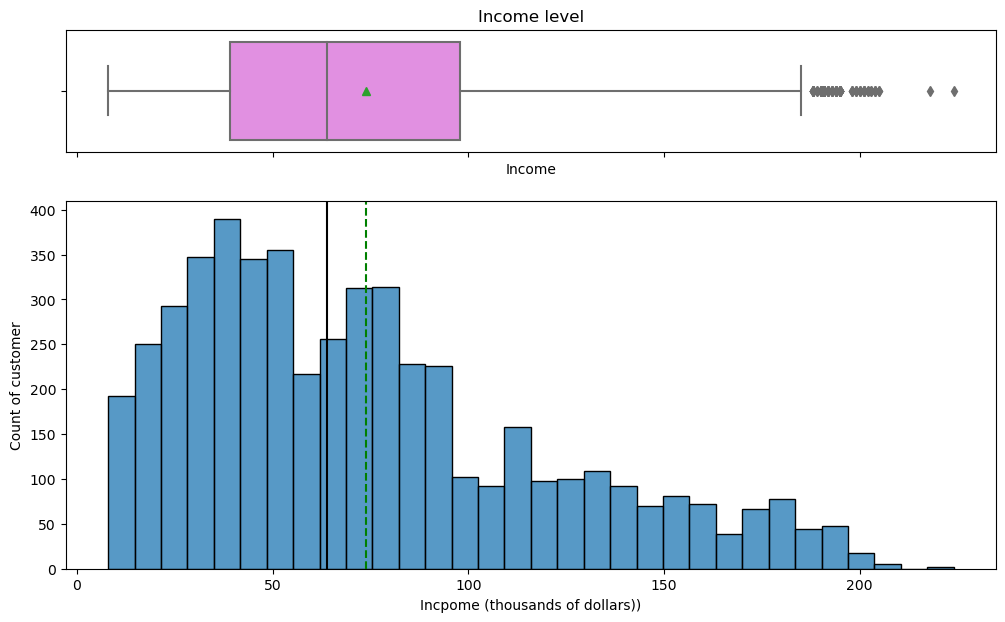

In [24]:
# Income plots
histogram_boxplot(Loan_Data, 'Income','Count of customer','Incpome (thousands of dollars))','Income level')

### Observations
- Average income level is around 70k
- Income is right skewed with many outliers in the higher income levels


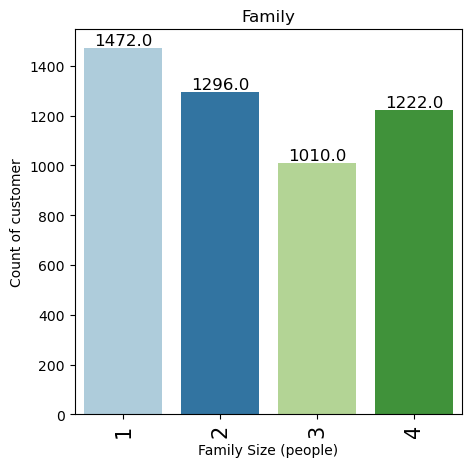

In [25]:
# Family plots
labeled_barplot(Loan_Data, 'Family','Count of customer','Family Size (people)','Family')

<Figure size 1000x500 with 0 Axes>

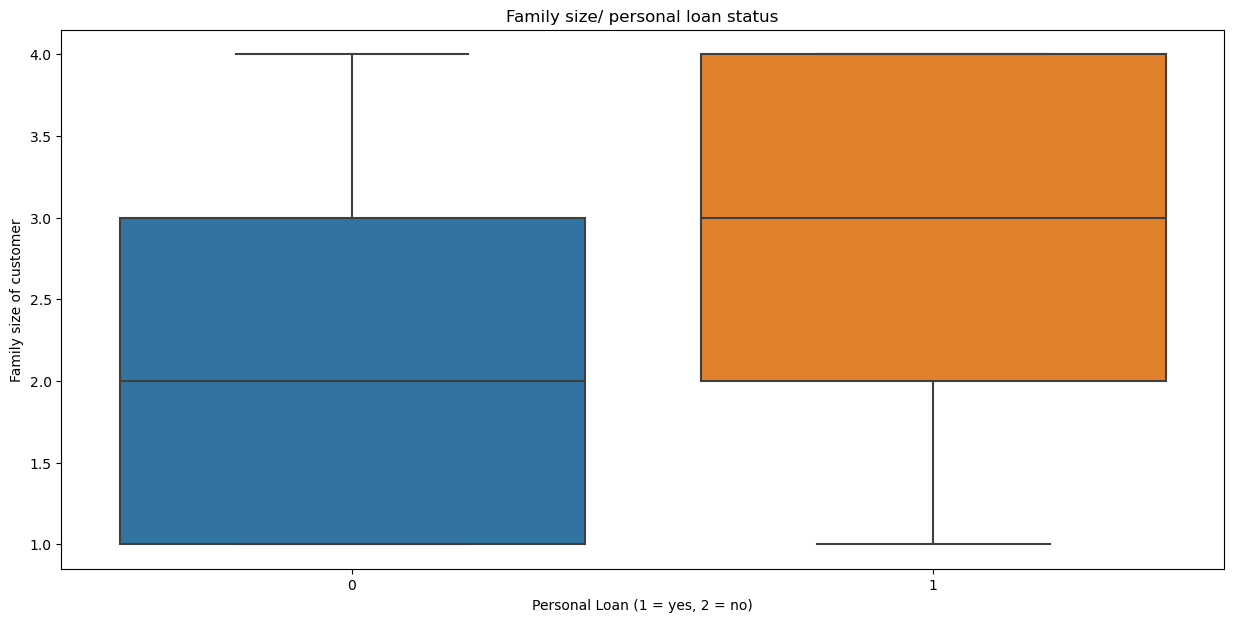

In [26]:
# Plot Family/ PERSONAL LOAN
plt.figure(figsize=(10, 5))
box_plot("Personal_Loan","Family","Family size of customer","Personal Loan (1 = yes, 2 = no)","Family size/ personal loan status")

plt.show()

### Observations
- Average family size is about 2.4 people.
- Family size ranges from 1 person to 4.


<Figure size 1000x500 with 0 Axes>

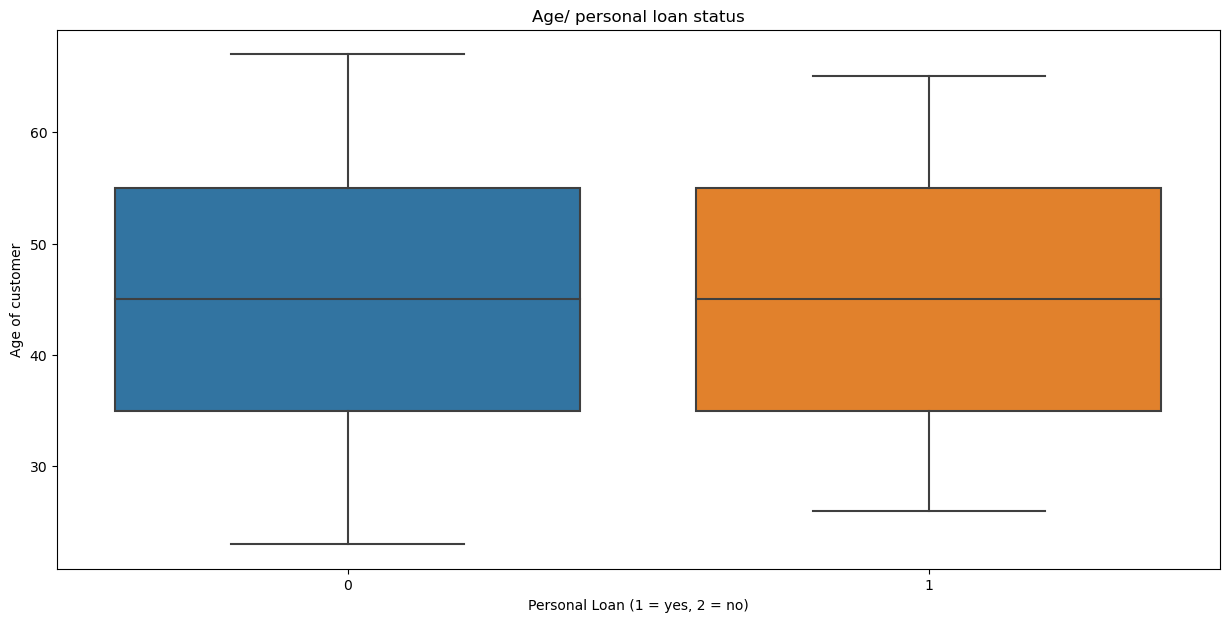

In [27]:
# Plot AGE/ PERSONAL LOAN
plt.figure(figsize=(10, 5))
box_plot("Personal_Loan","Age","Age of customer","Personal Loan (1 = yes, 2 = no)","Age/ personal loan status")

plt.show()

<Figure size 1000x500 with 0 Axes>

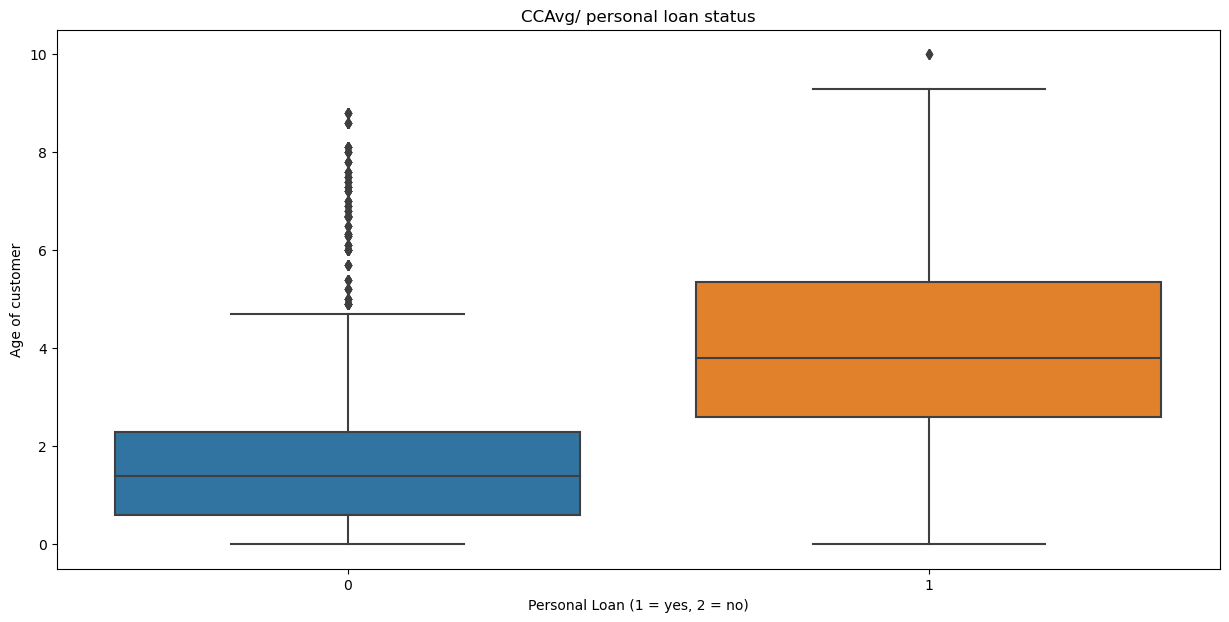

In [28]:
# Plot CCAVG/ PERSONAL LOAN
plt.figure(figsize=(10, 5))
box_plot("Personal_Loan","CCAvg","Age of customer","Personal Loan (1 = yes, 2 = no)","CCAvg/ personal loan status")

plt.show()

#### observation
- The customers that got a new loan had a higher min age and a lower max age.

<Figure size 1000x500 with 0 Axes>

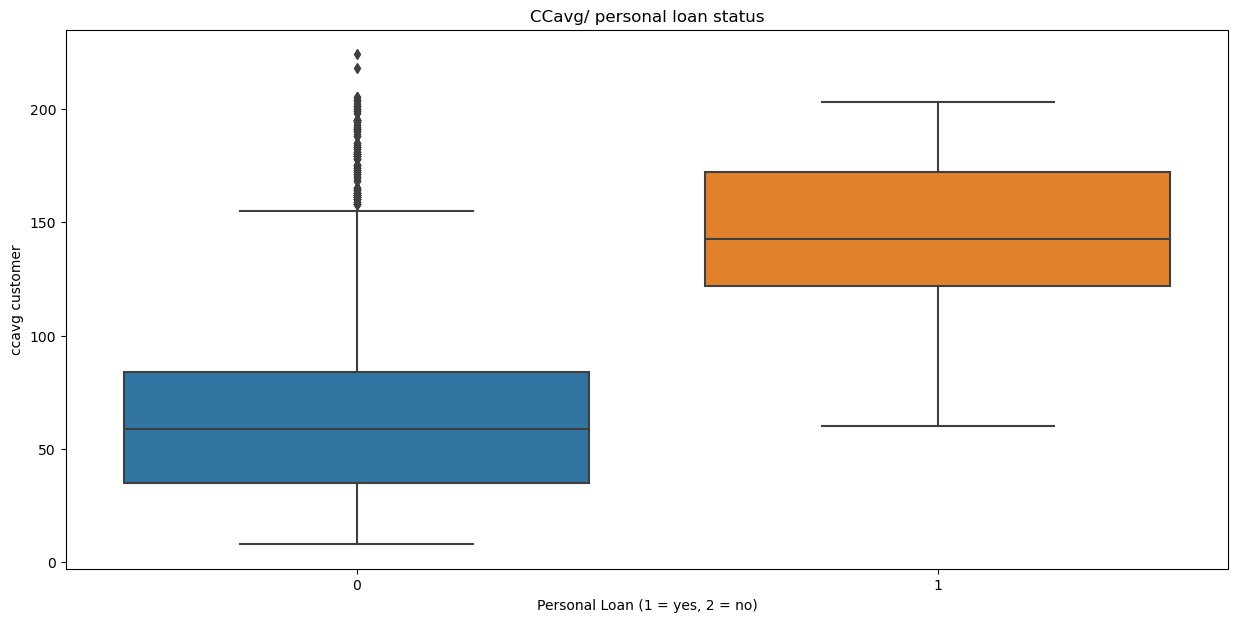

In [29]:
# Plot INCOME/ PERSONAL LOAN
plt.figure(figsize=(10, 5))
box_plot("Personal_Loan","Income","ccavg customer","Personal Loan (1 = yes, 2 = no)","CCavg/ personal loan status")

plt.show()

#### Observation
- Income level is higher in the personal loan customers
- No customers making less than about 55k are personal loan customers


<Figure size 1000x500 with 0 Axes>

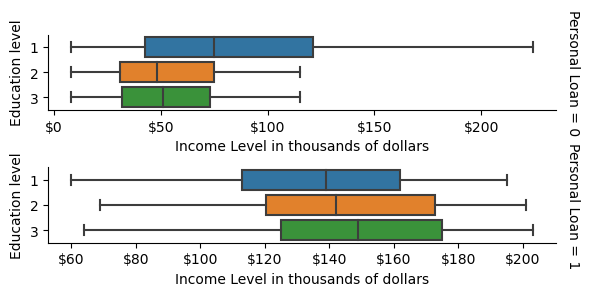

In [30]:
# Plot education, loan and income
plt.figure(figsize=(10, 5))

g = sns.catplot(
    data=Loan_Data,
    x="Income", y="Education", row="Personal_Loan",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Income Level in thousands of dollars", ylabel="Education level")
g.set_titles(row_template="Personal Loan = {row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

plt.show()

### Observation
- with this plot we can see that Income and education have an effect on whether someone will get a personal loan
- The higher the education and income increases the in the p=2 category

<Figure size 1000x500 with 0 Axes>

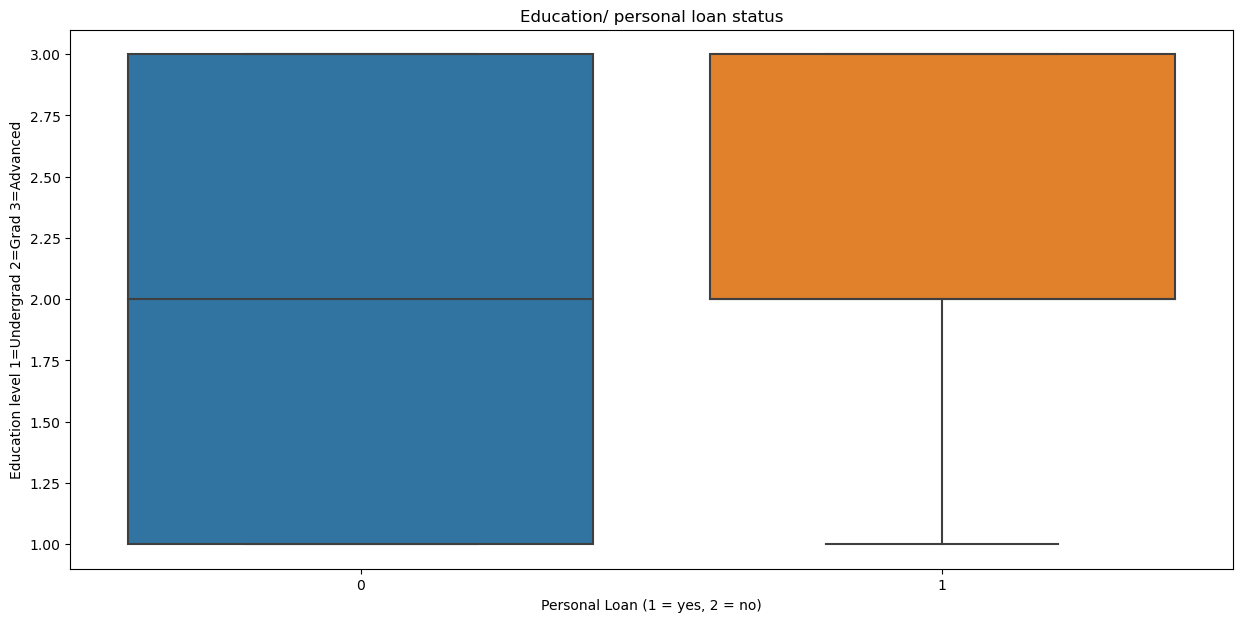

In [31]:
# Plot Education/ PERSONAL LOAN
plt.figure(figsize=(10, 5))
box_plot("Personal_Loan","Education","Education level 1=Undergrad 2=Grad 3=Advanced","Personal Loan (1 = yes, 2 = no)","Education/ personal loan status")

plt.show()

#### Observation
- Education level seems to be higher in the personal loan customers
- bottom 2 quartiles are Undergrads or Graduates for non personal loan customers
- Top 3 quartiles are Graduates or more for personal loan customers




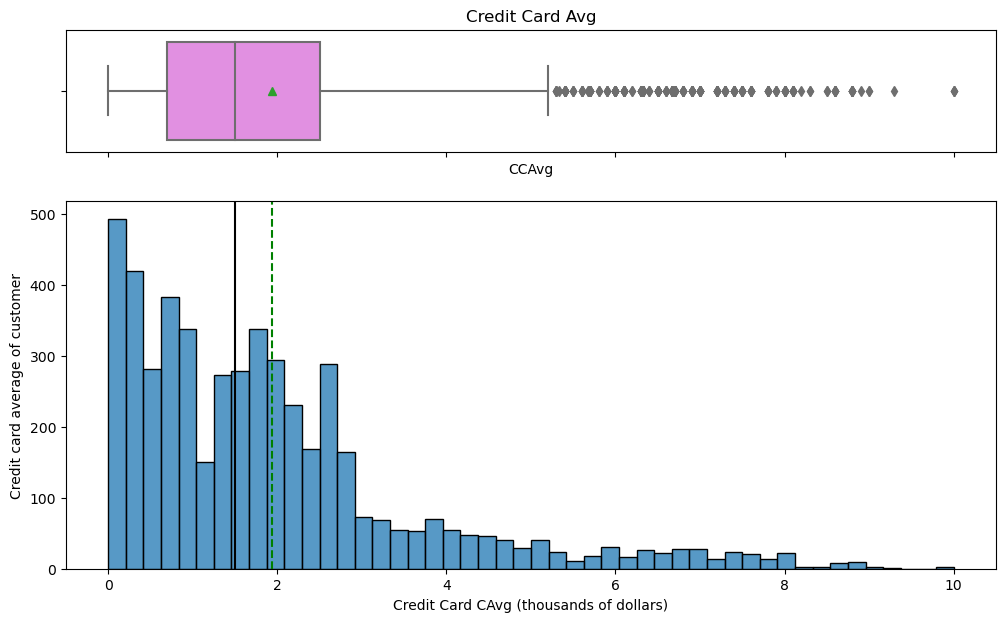

In [32]:
# CCavg plots
histogram_boxplot(Loan_Data, 'CCAvg','Credit card average of customer','Credit Card CAvg (thousands of dollars)','Credit Card Avg')

### Observations
- Average credit card spending is around 2k
- Average spending is right skewed with many outliers up to 10k

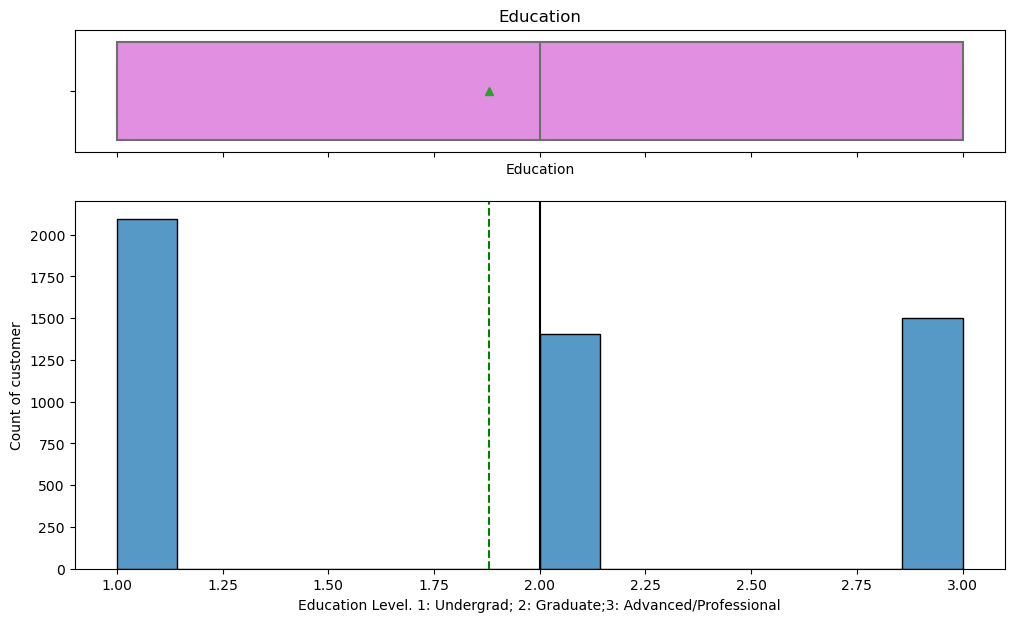

In [33]:
# Education plots
histogram_boxplot(Loan_Data, 'Education','Count of customer','Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional','Education')

### Observations
- Normal distribution of education levels. A slight amount more of undergrads than other 2 categories.


#### Family size vs Average card spend

<Figure size 1000x500 with 0 Axes>

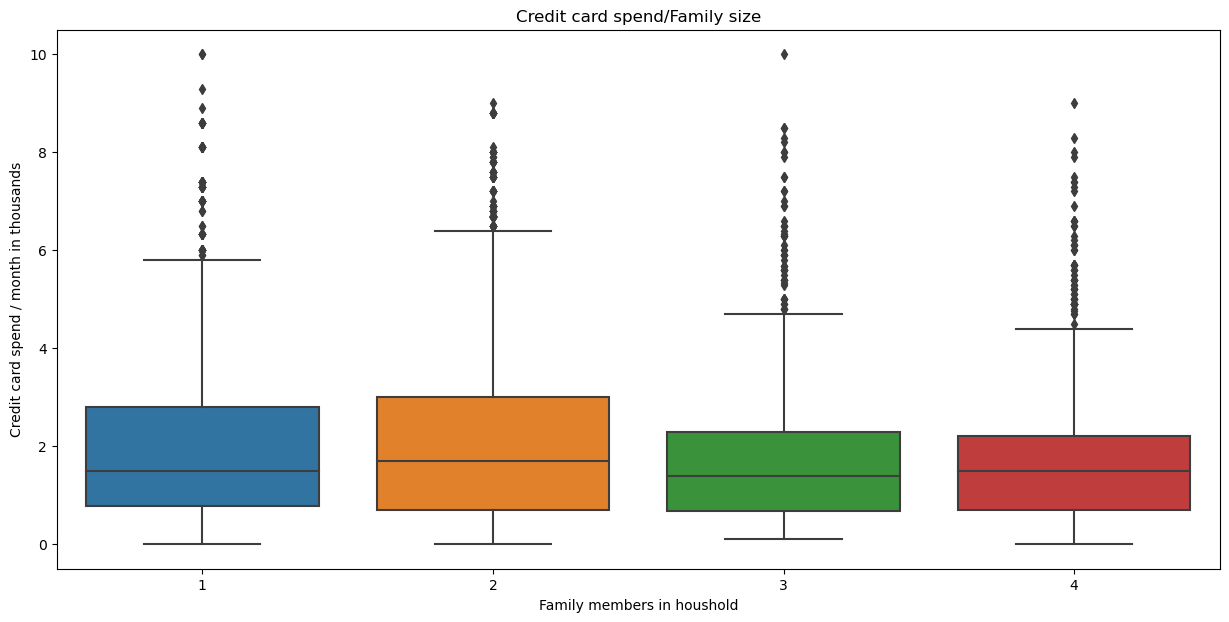

In [34]:
#Plot average cc spend and family together
plt.figure(figsize=(10, 5))
box_plot("Family","CCAvg","Credit card spend / month in thousands","Family members in houshold","Credit card spend/Family size")
plt.show()

#### Oberservations
- Average spending is pretty consistent across the family sizes
- there are many outliers for higher spending card customers

#### Education vs Average card spend

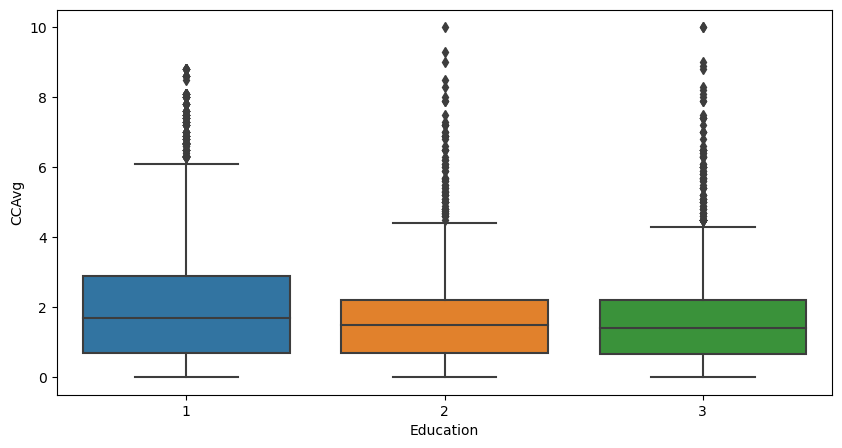

In [35]:
# Education vs card spend plotting
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="CCAvg", data=Loan_Data)
plt.show()

#### Observations
- Average spending is pretty consistent across education levels
- there are many outliers for higher spending card customers

### Income and county data

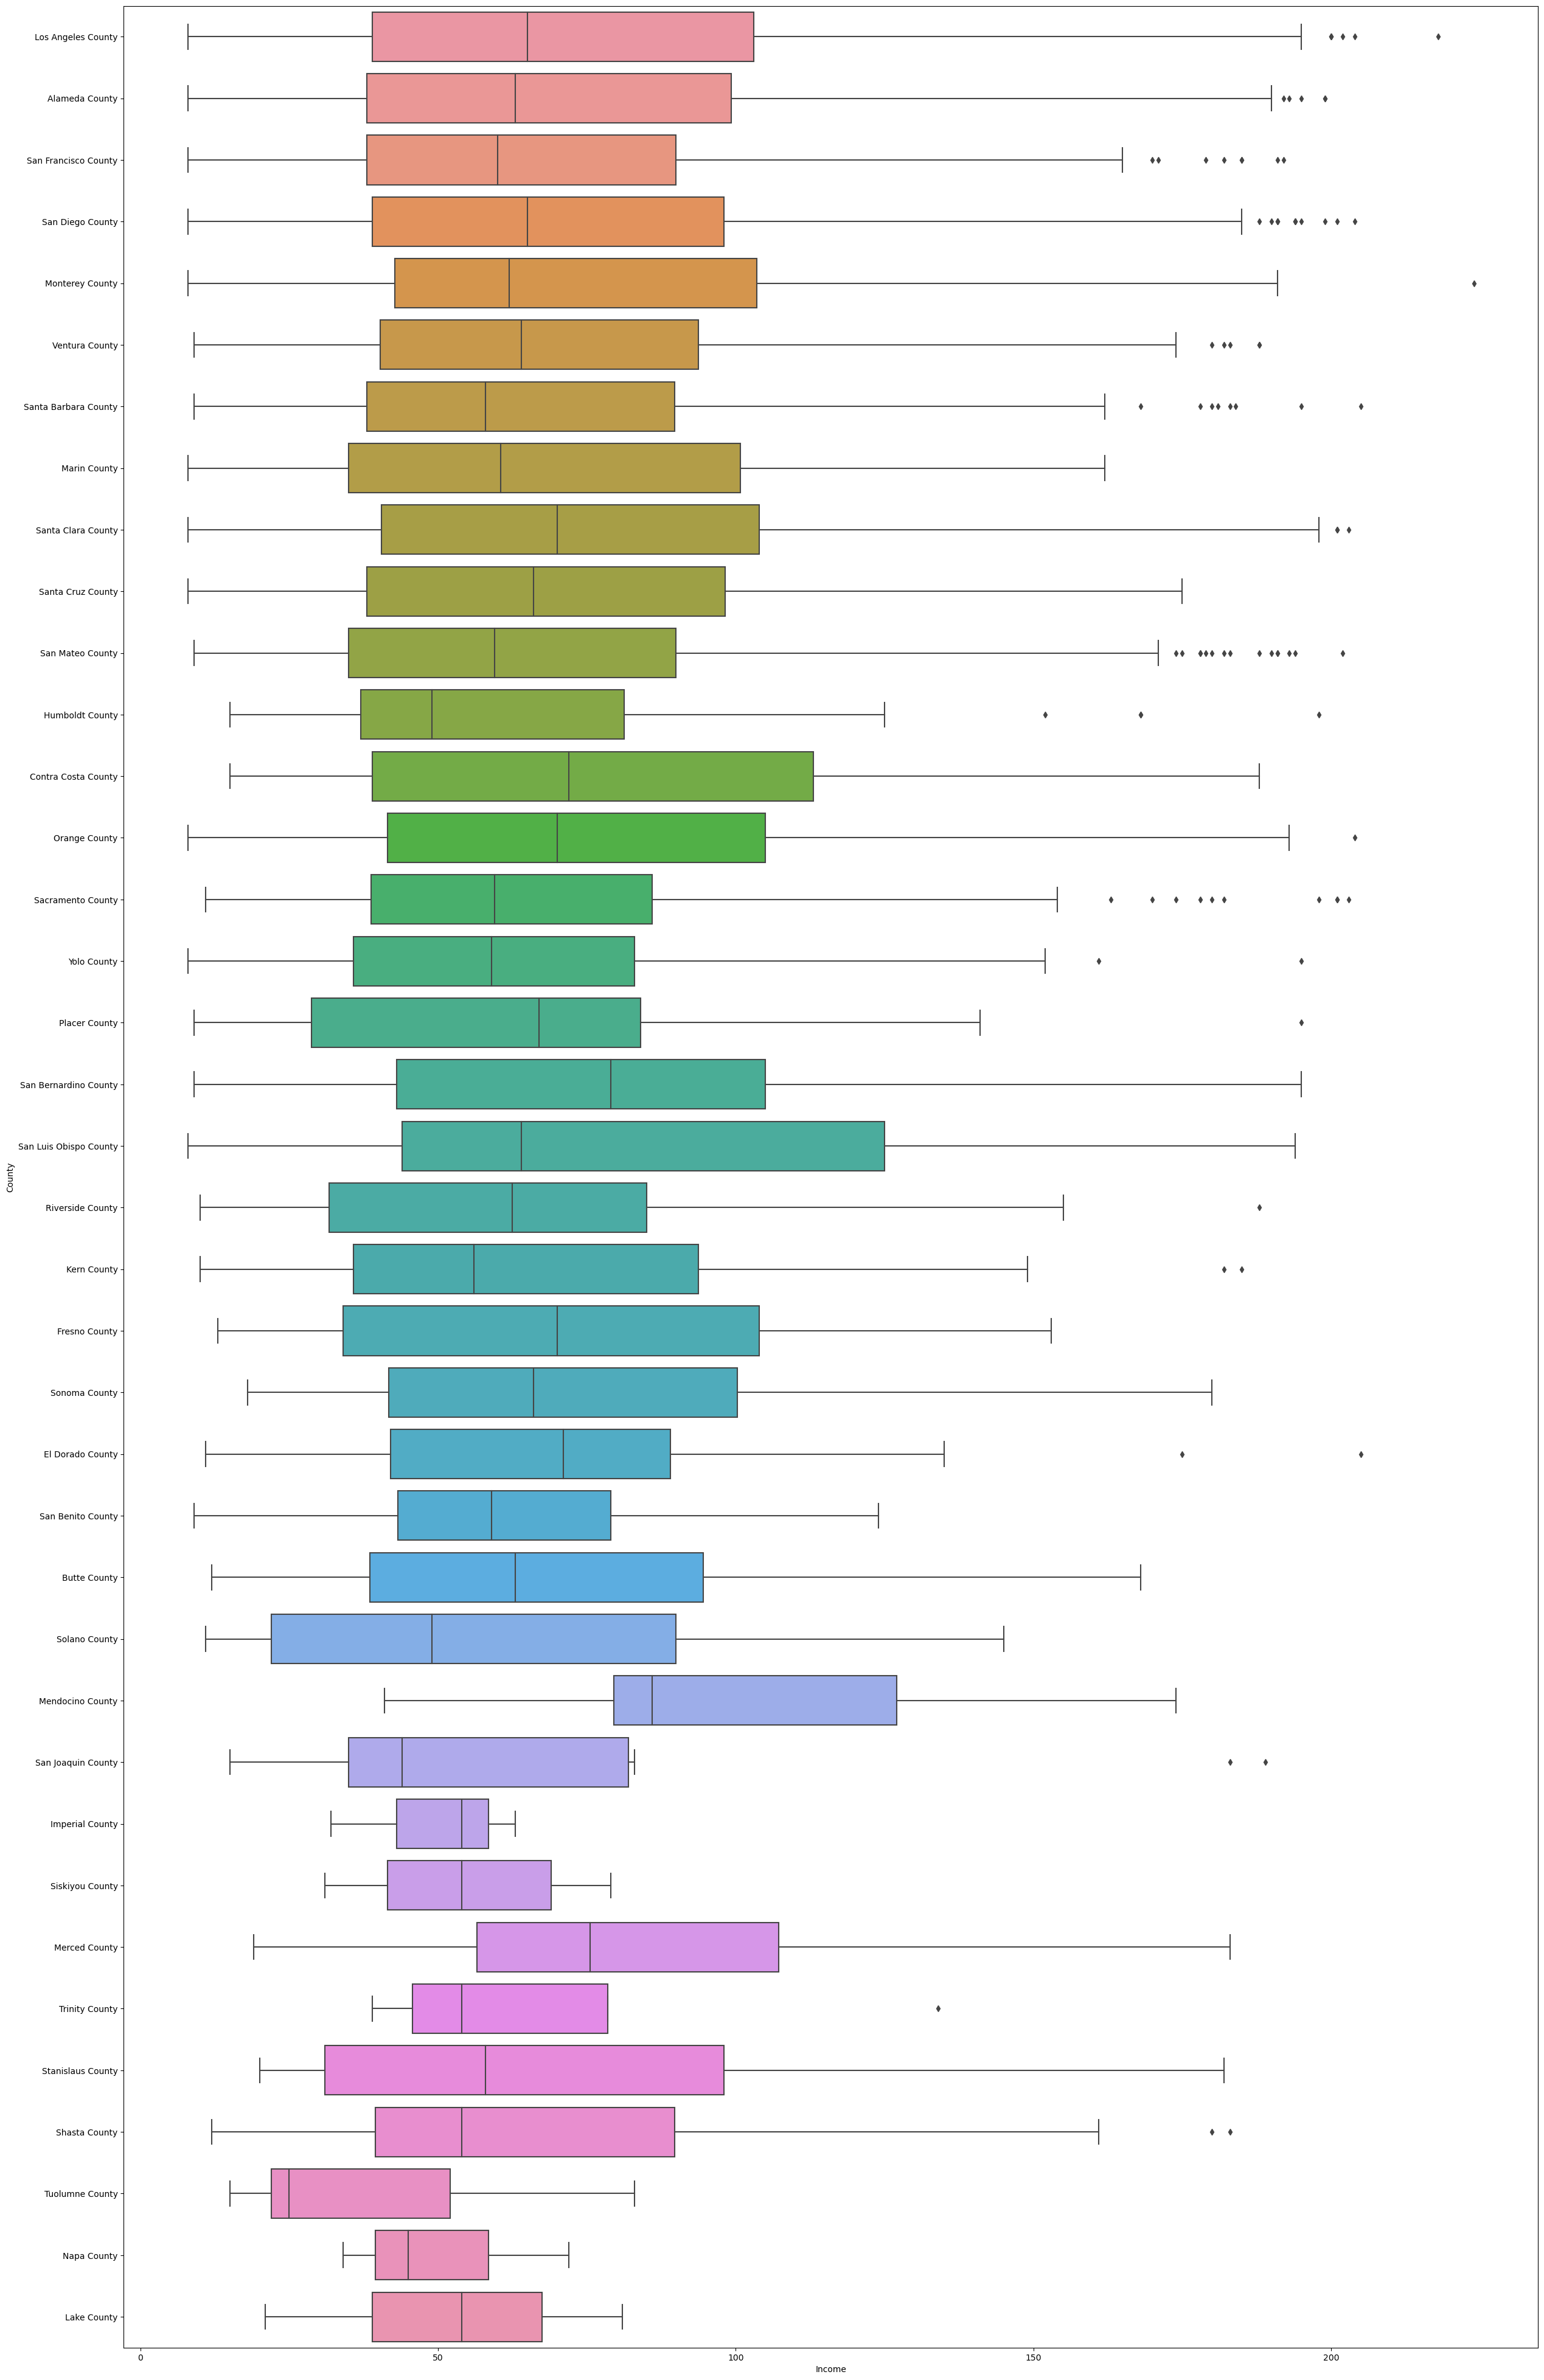

In [36]:
### Income / Countys
plt.figure(figsize=(30,50))
sns.boxplot(x="Income", y="County", data=Loan_Data)
plt.show()

#### Oberservations
- Based on income being something that may be corretlated to personal loan, we can see counties and the income distributions. 
- It's not yet known if there is a strong predictor. 
- This is more informative and helps to provide more data as we go through the modeling excercise.

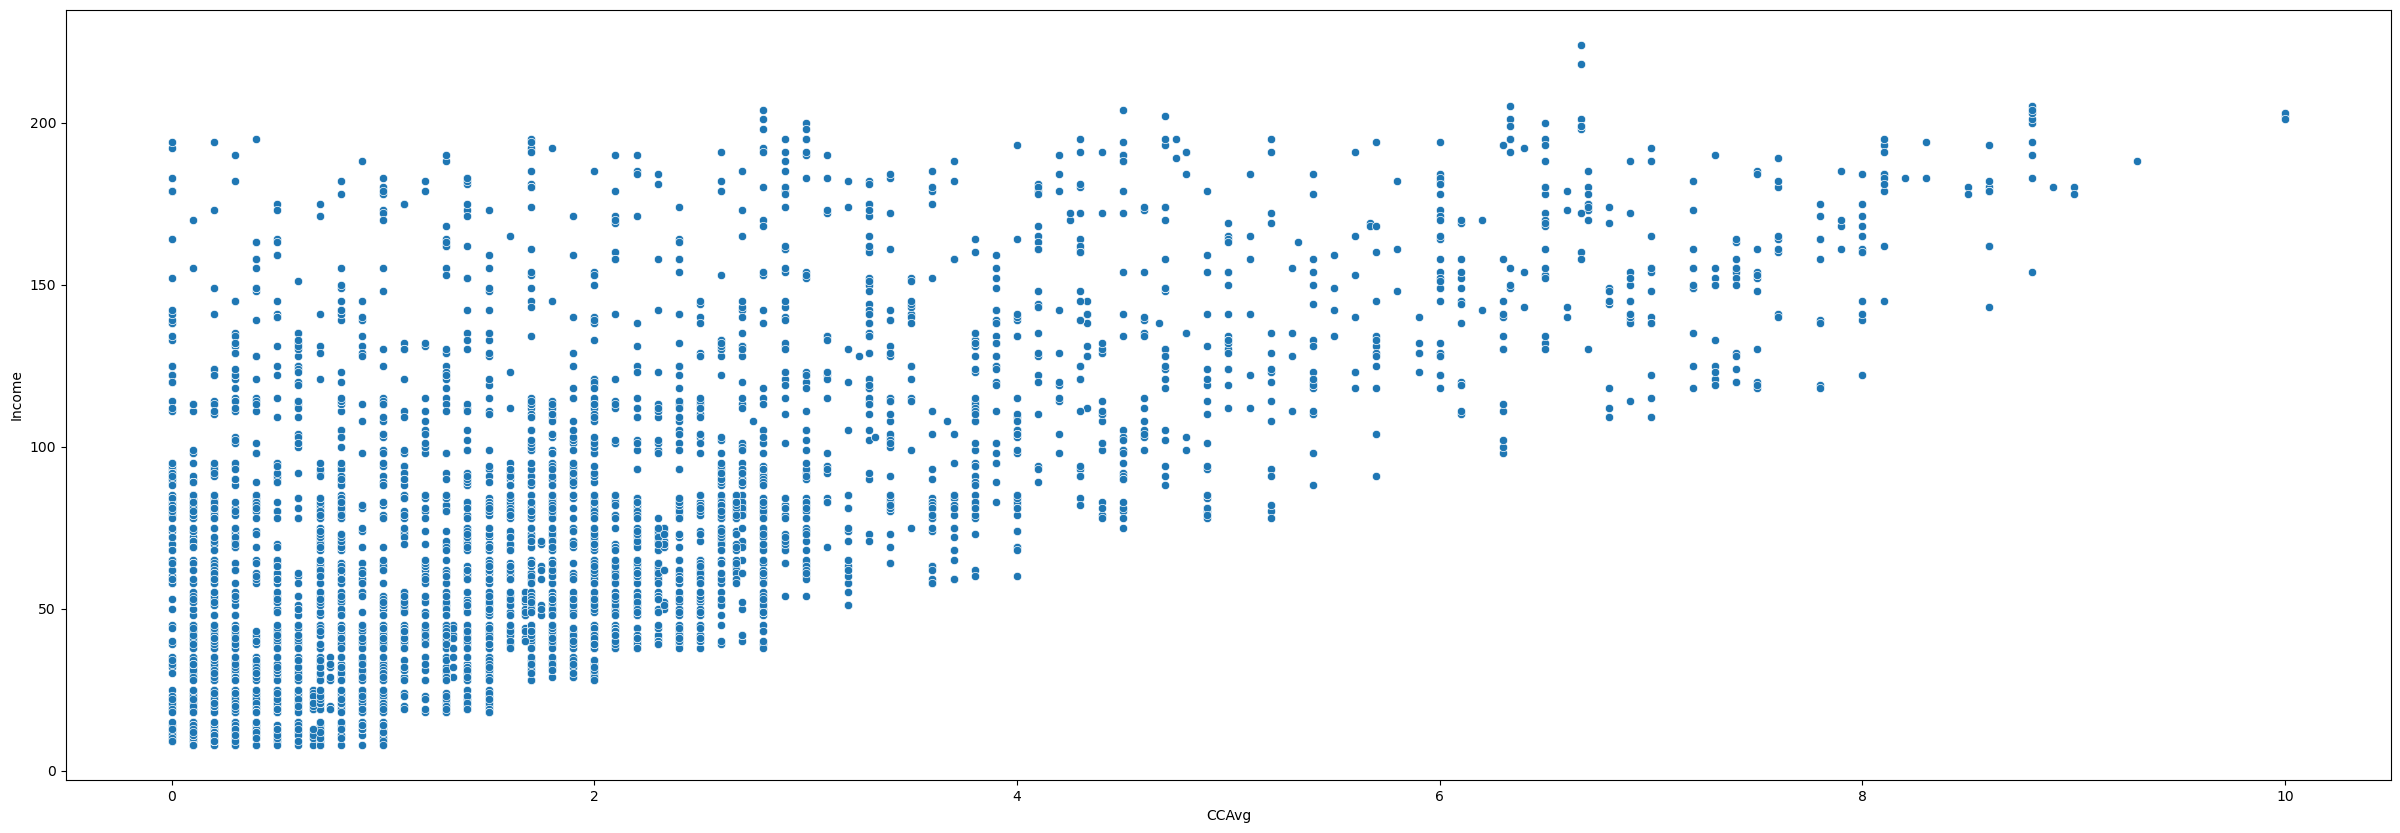

In [37]:
 ### Scatter plot for income and credit card
plt.figure(figsize=(30,10))
sns.scatterplot(x="CCAvg", y="Income", data=Loan_Data)
plt.show()

#### Oberservations
- We can see as income increases less and less higher Credit card spend is happening / month with makes sense and helps to validate the data.

In [38]:
# print so I can reuse these in the correlation heat map
print(Loan_Data.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State'],
      dtype='object')


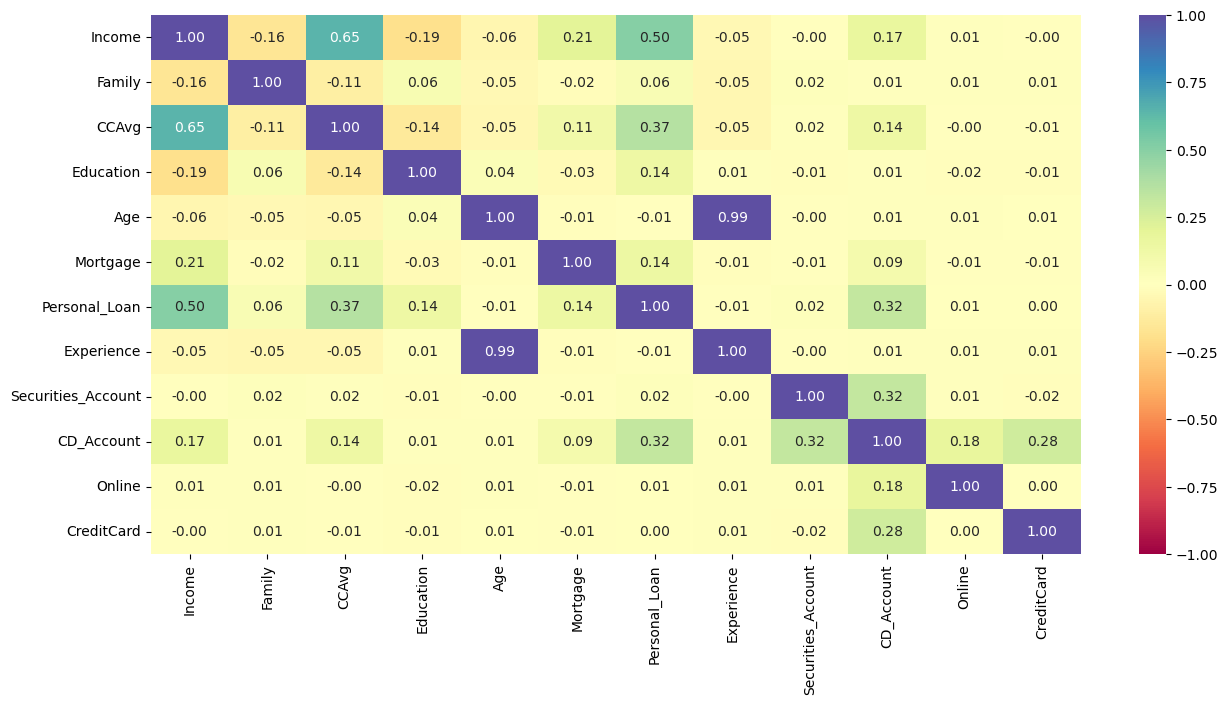

In [39]:
# Define column array to use in heatmap
columns= ['Income','Family', 'CCAvg','Education','Age','Mortgage', 'Personal_Loan', 'Experience','Securities_Account','CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State']

# creates a heatmap or correlated columns
plt.figure(figsize=(15, 7))
sns.heatmap(
Loan_Data[columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- Can see high correlation between age and experience
- Strong correlation between creasdi card average spend and income

## Data Preprocessing (continued)


* Outlier detection and treatment 
* Preparing data for modeling



#### Dropping variables
- Drop zip as we are using county, city and state.
- Drop the Experience as it's so correlated with age and will not add value
- Drop state as its all california

In [40]:

# Drop the ZIP column before we start the next analysis
Loan_Data.drop(columns=['ZIPCode'], inplace=True)

# Drop the Experience as it's so correlated with age and will not add value
Loan_Data.drop(columns=['Experience'], inplace=True)
# Drop the State as it's all california
Loan_Data.drop(columns=['State'], inplace=True)


#### Outlier Detection

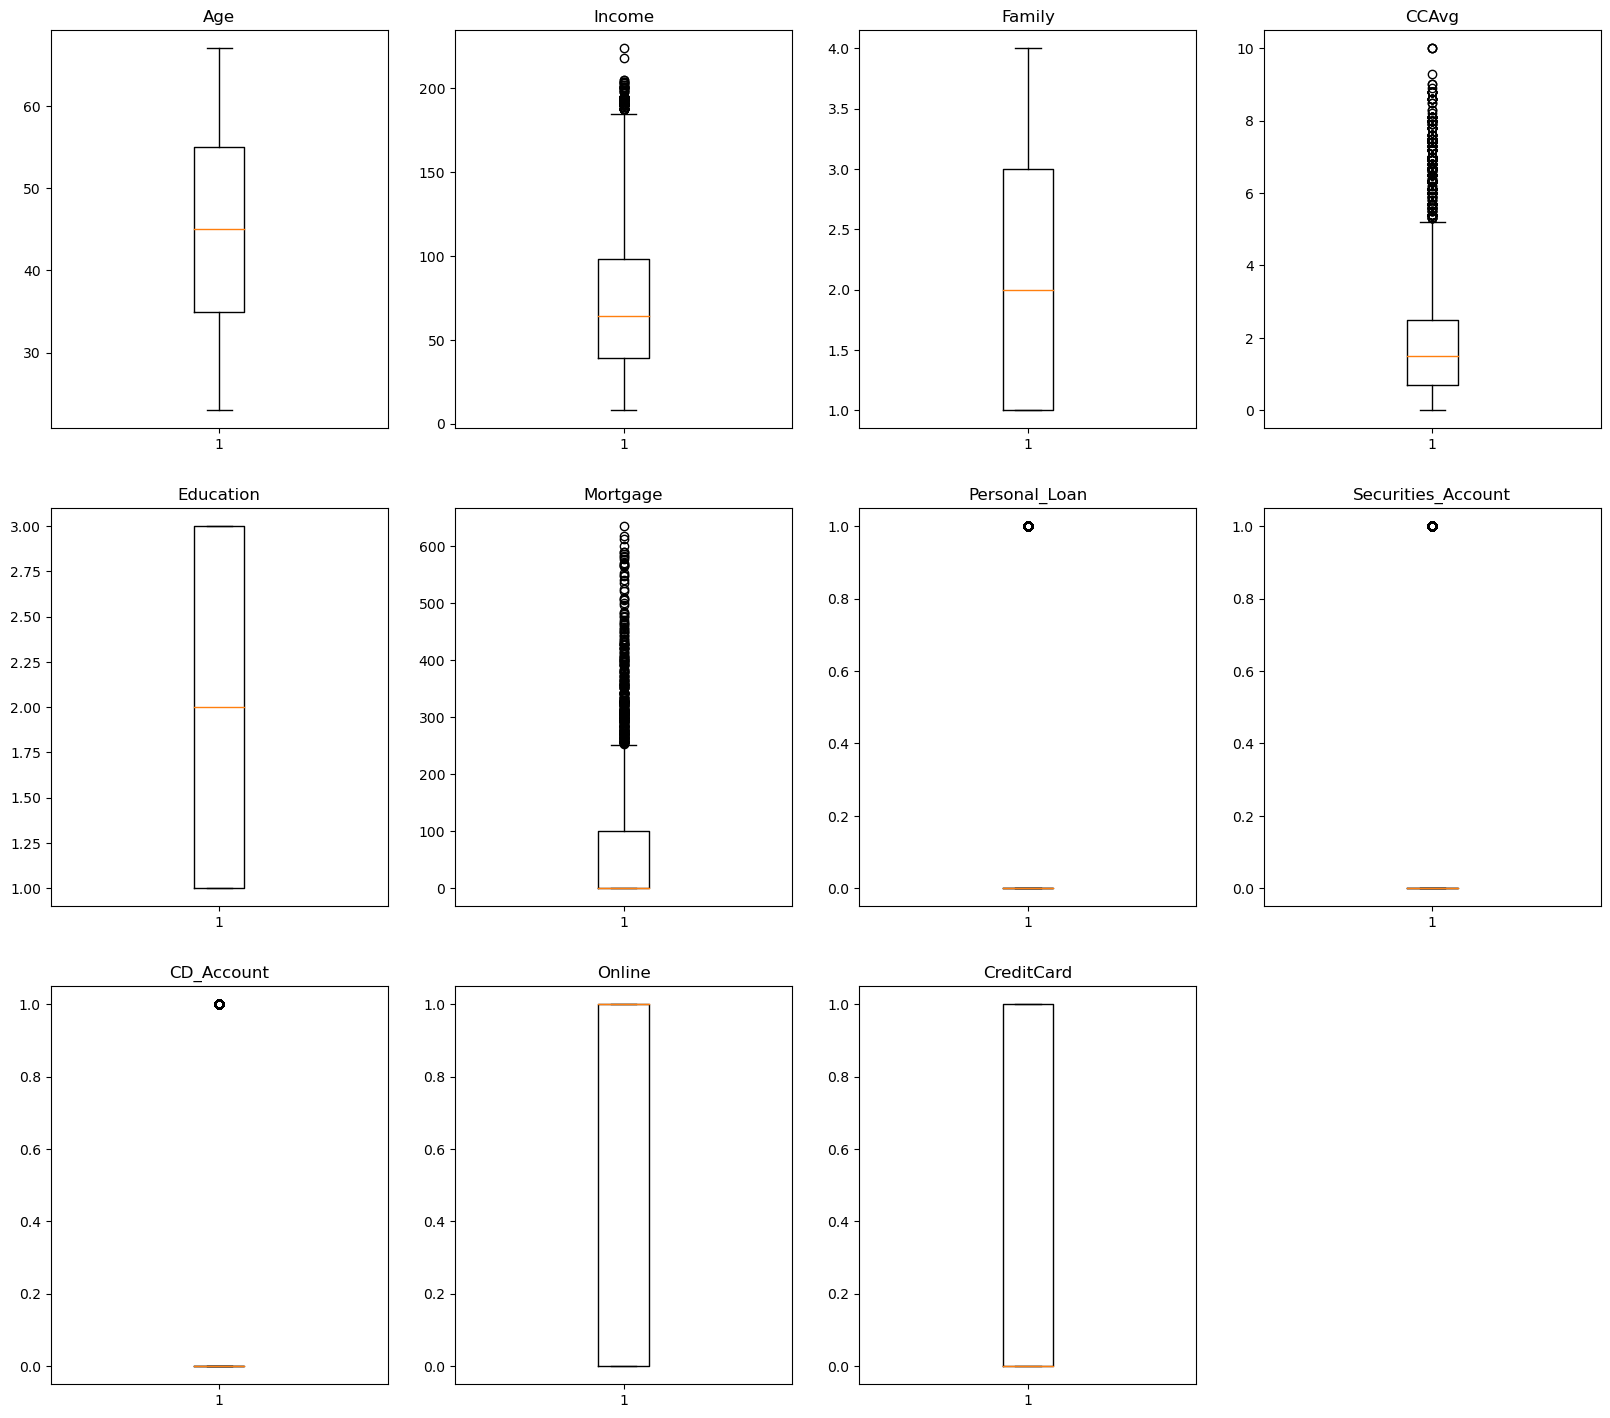

In [41]:
# Detect and plot outliers in each column,
numerical_col = Loan_Data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(Loan_Data[variable], whis=1.5)
    plt.title(variable)

plt.show()

#### Observations
- We have outliers that need to be managed in the Mortgage, CCAVG,
- We will not treeat outliers in CD_Account, Personal_Loan or Securities as these are only columns with 1 or 0

#### Outlier Treatment


In [42]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    #Treat outliers in a list of variables

    for c in col_list:
        df = treat_outliers(df, c)

    return df

##### Output new dataframe without personal loan pior to dropping outliers (if we drop personal loan outliers our model will not work as personal loan is 1 and 0)


In [43]:
# output new dataframe without personal loan pior to dropping outliers (if we drop personal loan outliers our model will not work as personal loan is 1 and 0)
treatOut = Loan_Data.drop(columns=['Personal_Loan','Securities_Account','CD_Account'])

In [44]:
#treat all outliers by removing them
numerical_col = treatOut.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(treatOut, numerical_col)

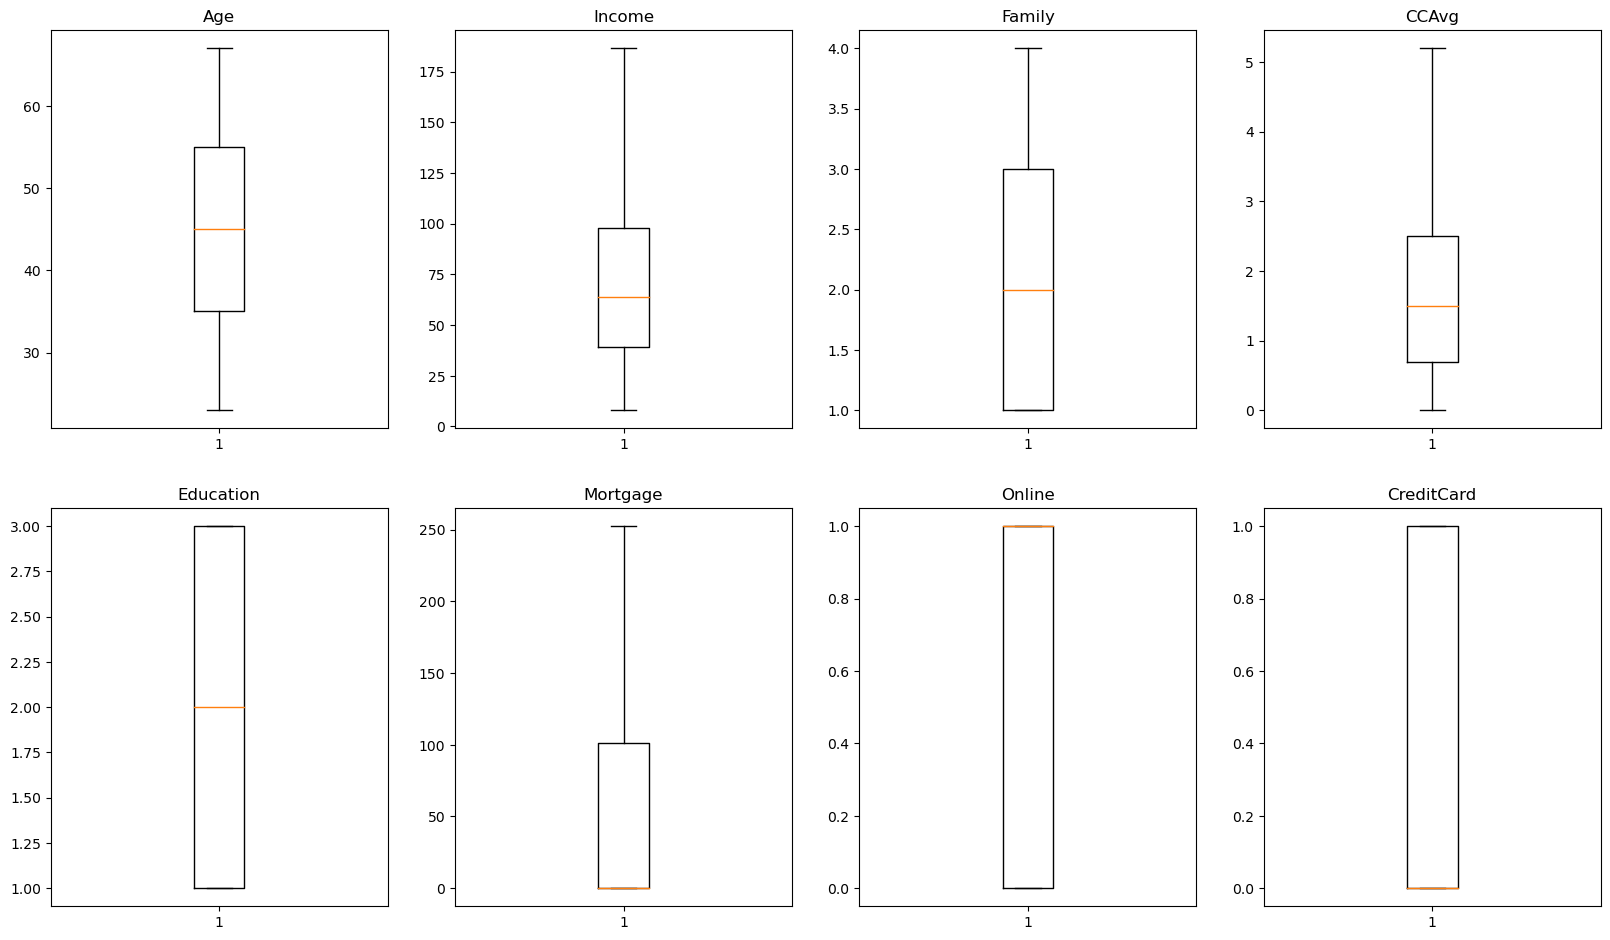

In [45]:
# look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.show()

#### Observations
- All outliers managed as can be seen in box plots above

## Model Building

### Model Evaluation Criterion

Evaluate: 

Under performance means:
1. Predicting a customer will get a personal loan but in reality the customer does not get a personal loan - False Positives
2. Predicting a customer will not get a personal loan but in reality the customer does get a personal loan - Loss of opportunity - False Negatives

**Our most important predictor?**
* Losing a potential customer by predicting that the customer will not sign up for a personal loan but in reality the customer will take the personal loan. - False Negatives

**What will we do to improve success?**
* Maximize the recall by minimizing the false negagtives when evaluating the model


### Model Building: Logistic Regression

**Creating training and test sets.**

In [46]:
# Rechecking the state of the dataframe to ensure all columns are as expected
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  City                5000 non-null   object 
 12  County              5000 non-null   object 
dtypes: float64(1), int64(10), object(2)
memory usage: 507.9+ KB


In [47]:
# specifying the independent X  and dependent Y variables 
X = Loan_Data.drop(["Personal_Loan"], axis=1)
Y = Loan_Data["Personal_Loan"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [48]:
# Providing some printed information to aid in understanding traning and test sets

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("")
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Loan_Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Loan_Data.index)) * 100))

Shape of Training set :  (3500, 291)
Shape of test set :  (1500, 291)

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64

70.00% data is in training set
30.00% data is in test set


#### Observation 
- We have a perfect allocation or 70/30 training to test.
- We have a fairly equal representation of the independent variable across training a test data sets.


In [49]:
# we will use this to do all performance metrics and test various thresholds
#  threshold has default value of .5
def confusionMatrixWithThreshold(model, predictors, target, threshold=0.5):
   
    #setup variables to that will be passed to CM funciton
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [50]:
# we will use this to do all performance metrics and test various thresholds
#  threshold has default value of .5
def check_model_performance_classification_with_threshold(
    model, predictors, target, threshold=0.5
):
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    # comopte accuracy, precision and recall anf fscore
    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )
    return df_perf


#### Build Logistic Model

In [51]:
# Building the LOgisitc regression model
lg = LogisticRegression(random_state=1)
#Fitting the training data
model = lg.fit(X_train, y_train)

In [52]:
# initial model 
model_score = model.score(X_test, y_test)
print("The score indcates that " + str(round(model_score*100)) + "% of the time predictions are correct and " + str(round(100-(model_score*100))) + "% of the predictions are incorrect.")

The score indcates that 94% of the time predictions are correct and 6% of the predictions are incorrect.


#### Observations 
- The score indcates that 94% of the time predictions are correct and 6% of the predictions are incorrect.

### Model Performance Improvement: Logistic Regression

#### ROC AUC

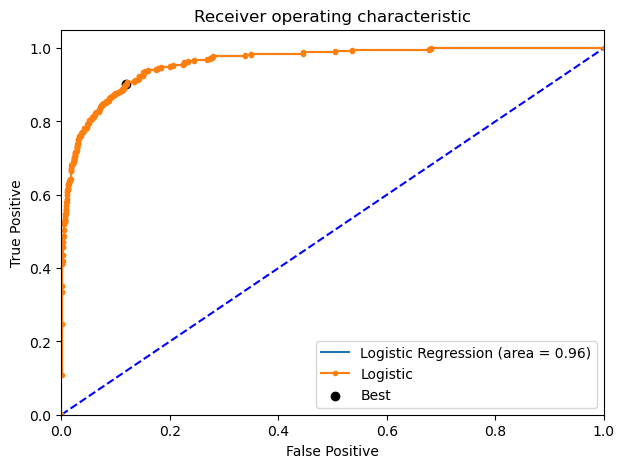

In [53]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)

#setup plot
plt.plot(fpr, tpr, marker='.', label='Logistic')
#Create optimmal threshold marker 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labeling plot
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observation
- Training data indicates a strong model with a .96 
- Black marker indicates the optimal threshold which is the optimal balance between False positive and True Positive

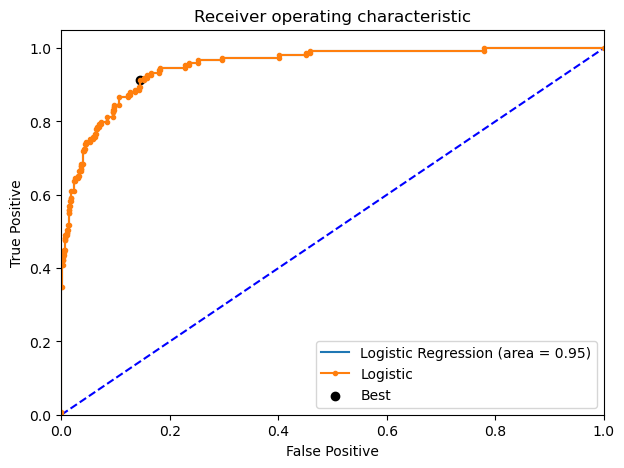

In [54]:
# Find the roc auc score for test data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))

# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observation 
- The AUC is .96 on the test and .95 on the training data set which is pretty close to 1, this is a good model.
- The curve indicating a large space above the blue line indicates we have an ability with this model to 96% of the time distinguish between tp and fp 
- Black marker indicates the optimal threshold which is the optimal balance between False positive and True Positive


In [55]:
# Optimal threshold for AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold for ROC AUC is " + str(optimal_threshold_auc_roc))

The optimal threshold for ROC AUC is 0.10923215086497905


#### Observation
- Optimal threshold of roughly .109 matches best threshold in plots above.

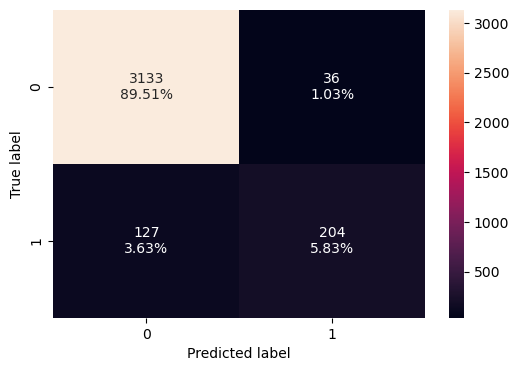

In [56]:
#make confusion matrix
confusionMatrixWithThreshold(lg, X_train, y_train)

In [57]:
# checking model performance for this model with training data
logRegTrainPerf = check_model_performance_classification_with_threshold(lg, X_train, y_train)
print("Training performance:")
logRegTrainPerf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.953429,0.616314,0.85,0.714536


#### Observations
- Training performance has very high accuracy and good precisions
- The Recall is on the lower end
- True Positive = 89.51
- True Negative = 5.83
- False Positive Type 1 = 3.63
- False Negative Type 2 =  1.03

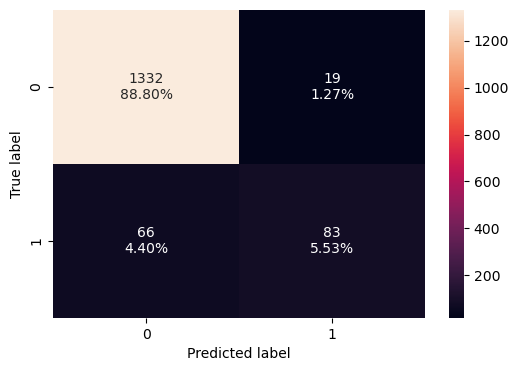

In [58]:
# create confusion matrix on test data
confusionMatrixWithThreshold(lg, X_test, y_test)

In [59]:
# checking model performance for this model with test data
logRegTestPerf = check_model_performance_classification_with_threshold(lg, X_test, y_test)
print("Test data performance:")
logRegTestPerf

Test data performance:


,Accuracy,Recall,Precision,F1
0,0.943333,0.557047,0.813725,0.661355


#### Observations
- True Positive = 88.80
- True Negative = 5.53
- False Positive Type 1 = 4.40
- False Negative Type 2 =  1.27
- Test performance has high accuracy and good precision
- The Recall is on the lower end as well
- Test as expected does not perform quite as well as train data

#### Use optimal thresholds calulated and retest performance
- We will check to see if using an optimal threshold calculate will improve performance

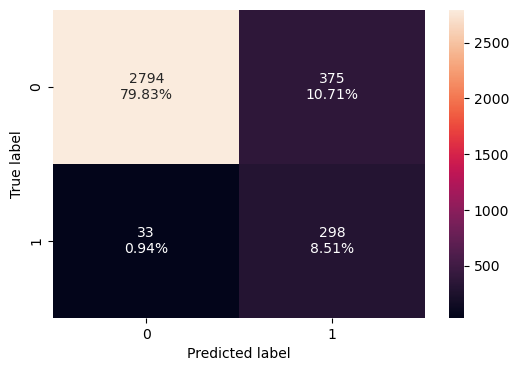

In [60]:
# create confusion matrix training data with optimal Threshold
confusionMatrixWithThreshold(lg, X_train, y_train,threshold=optimal_threshold_auc_roc)

In [61]:
# checking model performance for this model with training data with optimal threshold
logRegTrainPerfThreshold_AucRoc = check_model_performance_classification_with_threshold(lg, X_train, y_train,threshold=optimal_threshold_auc_roc)
print("Training performance:")
logRegTrainPerfThreshold_AucRoc


Training performance:


,Accuracy,Recall,Precision,F1
0,0.883429,0.900302,0.442793,0.593625


#### Observation
- True Positive = 79.83
- True Negative = 8.51
- False Positive Type 1 = 10.71
- False Negative Type 2 =  .94
- Recall improved a lot in but at the expense of precision which dropped a lot.
- F1 which measure precision and recall together also dropped

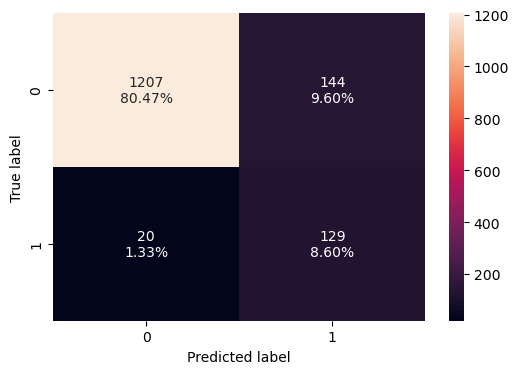

In [62]:
# create confusion matrix test data with optimal Threshold
cm = confusionMatrixWithThreshold(lg, X_test, y_test,threshold=optimal_threshold_auc_roc)



In [63]:
# checking model performance for this model with test data with optimal threshold
logRegTestPerf_threshold_auc_roc = check_model_performance_classification_with_threshold(lg, X_test, y_test,threshold=optimal_threshold_auc_roc)
print("Test performance:")
logRegTestPerf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.890667,0.865772,0.472527,0.611374


#### Observations
- True Positive = 80.47
- True Negative = 8.60
- False Positive Type 1 = 9.6
- False Negative Type 2 =  1.33 (this is quite important for us to minimize to ensure we are not losing opportunities with banking customers.)
- Test performance has high accuracy and high recall (very good for us as we want to maximise recall)
- Test as expected does not perform quite as well as train data


#### Precision Recall curve setup

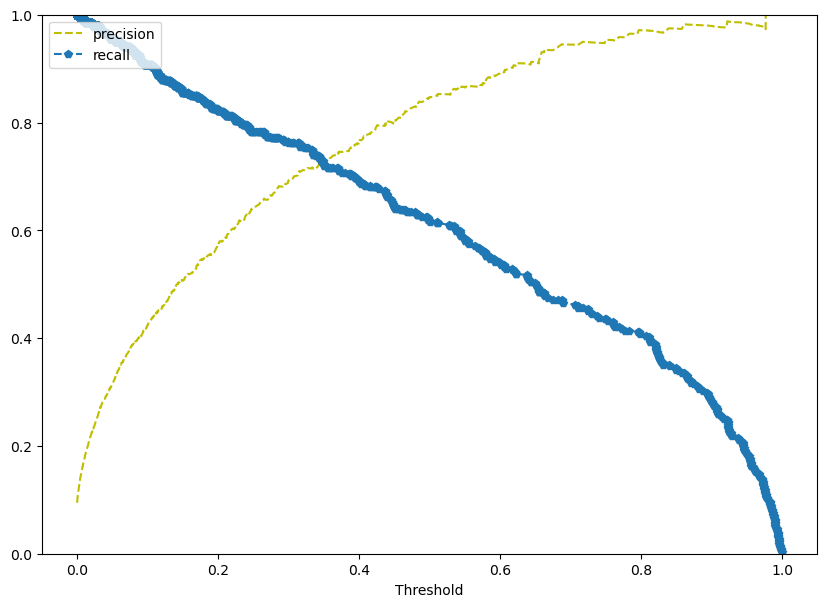

In [64]:
# PLot the precision recall curve
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "y--", label="precision")
    plt.plot(thresholds, recalls[:-1], "p--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

##### Observations
- The optimimum threshold where we maximise recall and precision is .35.

##### Check performance on test and training with optimal threshold of .35 from precision recall

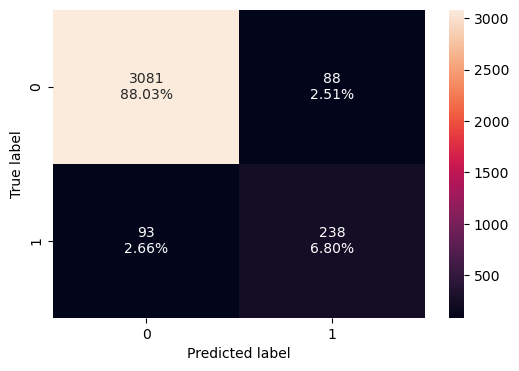

In [65]:
# Setup confusion matrix training data with optimal Threshold
confusionMatrixWithThreshold(lg, X_train, y_train,.35)

In [66]:
# checking model performance for this model with training data with optimal threshold
logRegTrainPerf_threshold_P_Recall = check_model_performance_classification_with_threshold(lg, X_train, y_train,.35)
print("Training performance:")
logRegTrainPerf_threshold_P_Recall


Training performance:


,Accuracy,Recall,Precision,F1
0,0.948286,0.719033,0.730061,0.724505


Observation: As expected recall and precision very close together based on the optimal threshold calaculated on the training set.

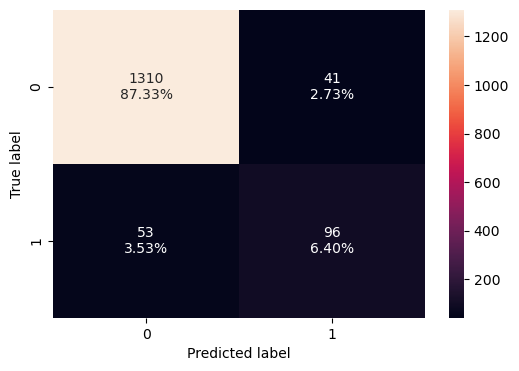

In [67]:
# create confusion matrix test data with optimal Threshold
confusionMatrixWithThreshold(lg, X_test, y_test,threshold=.35)


In [68]:
# checking model performance for this model with test data with optimal threshold
logRegTestPerfThreshold_P_Recall = check_model_performance_classification_with_threshold(lg, X_test, y_test,threshold=.35)
print("The test performance:")
logRegTestPerfThreshold_P_Recall


The test performance:


,Accuracy,Recall,Precision,F1
0,0.937333,0.644295,0.70073,0.671329


Observation: The test set was a bit lower on recall and precision.

#### Final Comparison of the Logistic regression models

In [69]:
# Training data performance comparison

trainComparison_df = pd.concat(
    [
        logRegTrainPerf.T,
        logRegTrainPerfThreshold_AucRoc.T,
        logRegTrainPerf_threshold_P_Recall.T,
    ],
    axis=1,
)
trainComparison_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with / ROC AUC thres",
    "Logistic Regression with / prec recall thres",
]

print("Training data set performance comparison:")

trainComparison_df

Training data set performance comparison:


,Logistic Regression sklearn,Logistic Regression with / ROC AUC thres,Logistic Regression with / prec recall thres
Accuracy,0.953429,0.883429,0.948286
Recall,0.616314,0.900302,0.719033
Precision,0.850000,0.442793,0.730061
F1,0.714536,0.593625,0.724505


In [70]:
# Test performance comparison
testComparison_df = pd.concat(
    [
        logRegTestPerf.T,
        logRegTestPerf_threshold_auc_roc.T,
        logRegTestPerfThreshold_P_Recall.T,
    ],
    axis=1,
)
testComparison_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with optimal ROC AUC threshold",
    "Logistic Regression with optimal precision recall",
]

print("Test data set performance comparison:")
testComparison_df

Test data set performance comparison:


,Logistic Regression sklearn,Logistic Regression with optimal ROC AUC threshold,Logistic Regression with optimal precision recall
Accuracy,0.943333,0.890667,0.937333
Recall,0.557047,0.865772,0.644295
Precision,0.813725,0.472527,0.700730
F1,0.661355,0.611374,0.671329


### Observation 
- Based on the three scenarios the one that will best meet the needs for the use case for the personal loan problem is #2 "Logistic Regression with / ROC AUC thres"
- A high recall of 86% and coupled with a low Type 2 False Negatives. 

### Model Building: Decision Tree

In [71]:
# Building a new DEcision tree model and fitting data
loanTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [72]:
#printing accuracy after fitting
print("Accuracy on training set : ",loanTree.score(X_train, y_train))
print("Accuracy on test set : ",loanTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333


In [73]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    return [metrics.recall_score(y_train,pred_train),metrics.recall_score(y_test,pred_test)]

In [74]:
# Functon that will make a new confusion matrix
def generate_confusion_matrix(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    

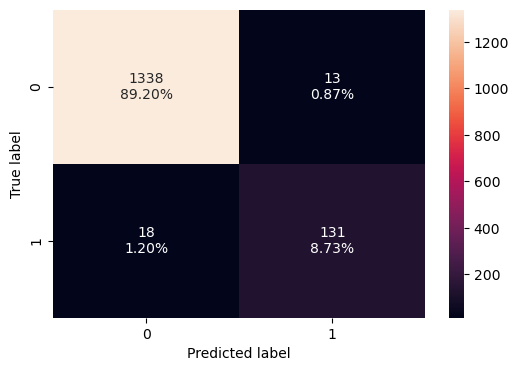

In [75]:
#setup confusion matrix
generate_confusion_matrix(loanTree,X_test,y_test)


In [76]:
#variables to later compare
loanTree_acc_train = loanTree.score(X_train, y_train)
loanTree_acc_test = loanTree.score(X_test, y_test)
loanTree_recall =  get_recall_score(loanTree)

# Accuracy on train and test
print("Accuracy on training data -- ",loanTree_acc_train)
print("Accuracy on test data -- ",loanTree_acc_test)
print("Recall on training data -- ",loanTree_recall[0])
print("Recall on test data -- ", loanTree_recall[1])


Accuracy on training data --  1.0
Accuracy on test data --  0.9793333333333333
Recall on training data --  1.0
Recall on test data --  0.8791946308724832


#### Visualize the decision tree

In [77]:
#print out the features so we can reuse in further code
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City_Alameda', 'City_Alamo', 'City_Albany', 'City_Alhambra', 'City_Anaheim', 'City_Antioch', 'City_Aptos', 'City_Arcadia', 'City_Arcata', 'City_Bakersfield', 'City_Baldwin Park', 'City_Banning', 'City_Bella Vista', 'City_Belmont', 'City_Belvedere Tiburon', 'City_Ben Lomond', 'City_Berkeley', 'City_Beverly Hills', 'City_Bodega Bay', 'City_Bonita', 'City_Boulder Creek', 'City_Brea', 'City_Brisbane', 'City_Burlingame', 'City_Calabasas', 'City_Camarillo', 'City_Campbell', 'City_Canoga Park', 'City_Capistrano Beach', 'City_Capitola', 'City_Cardiff By The Sea', 'City_Carlsbad', 'City_Carpinteria', 'City_Carson', 'City_Castro Valley', 'City_Ceres', 'City_Chatsworth', 'City_Chico', 'City_Chino', 'City_Chino Hills', 'City_Chula Vista', 'City_Citrus Heights', 'City_Claremont', 'City_Clearlake', 'City_Clovis', 'City_Concord', 'City_Costa Mesa', 'City_Crestline', 'Cit

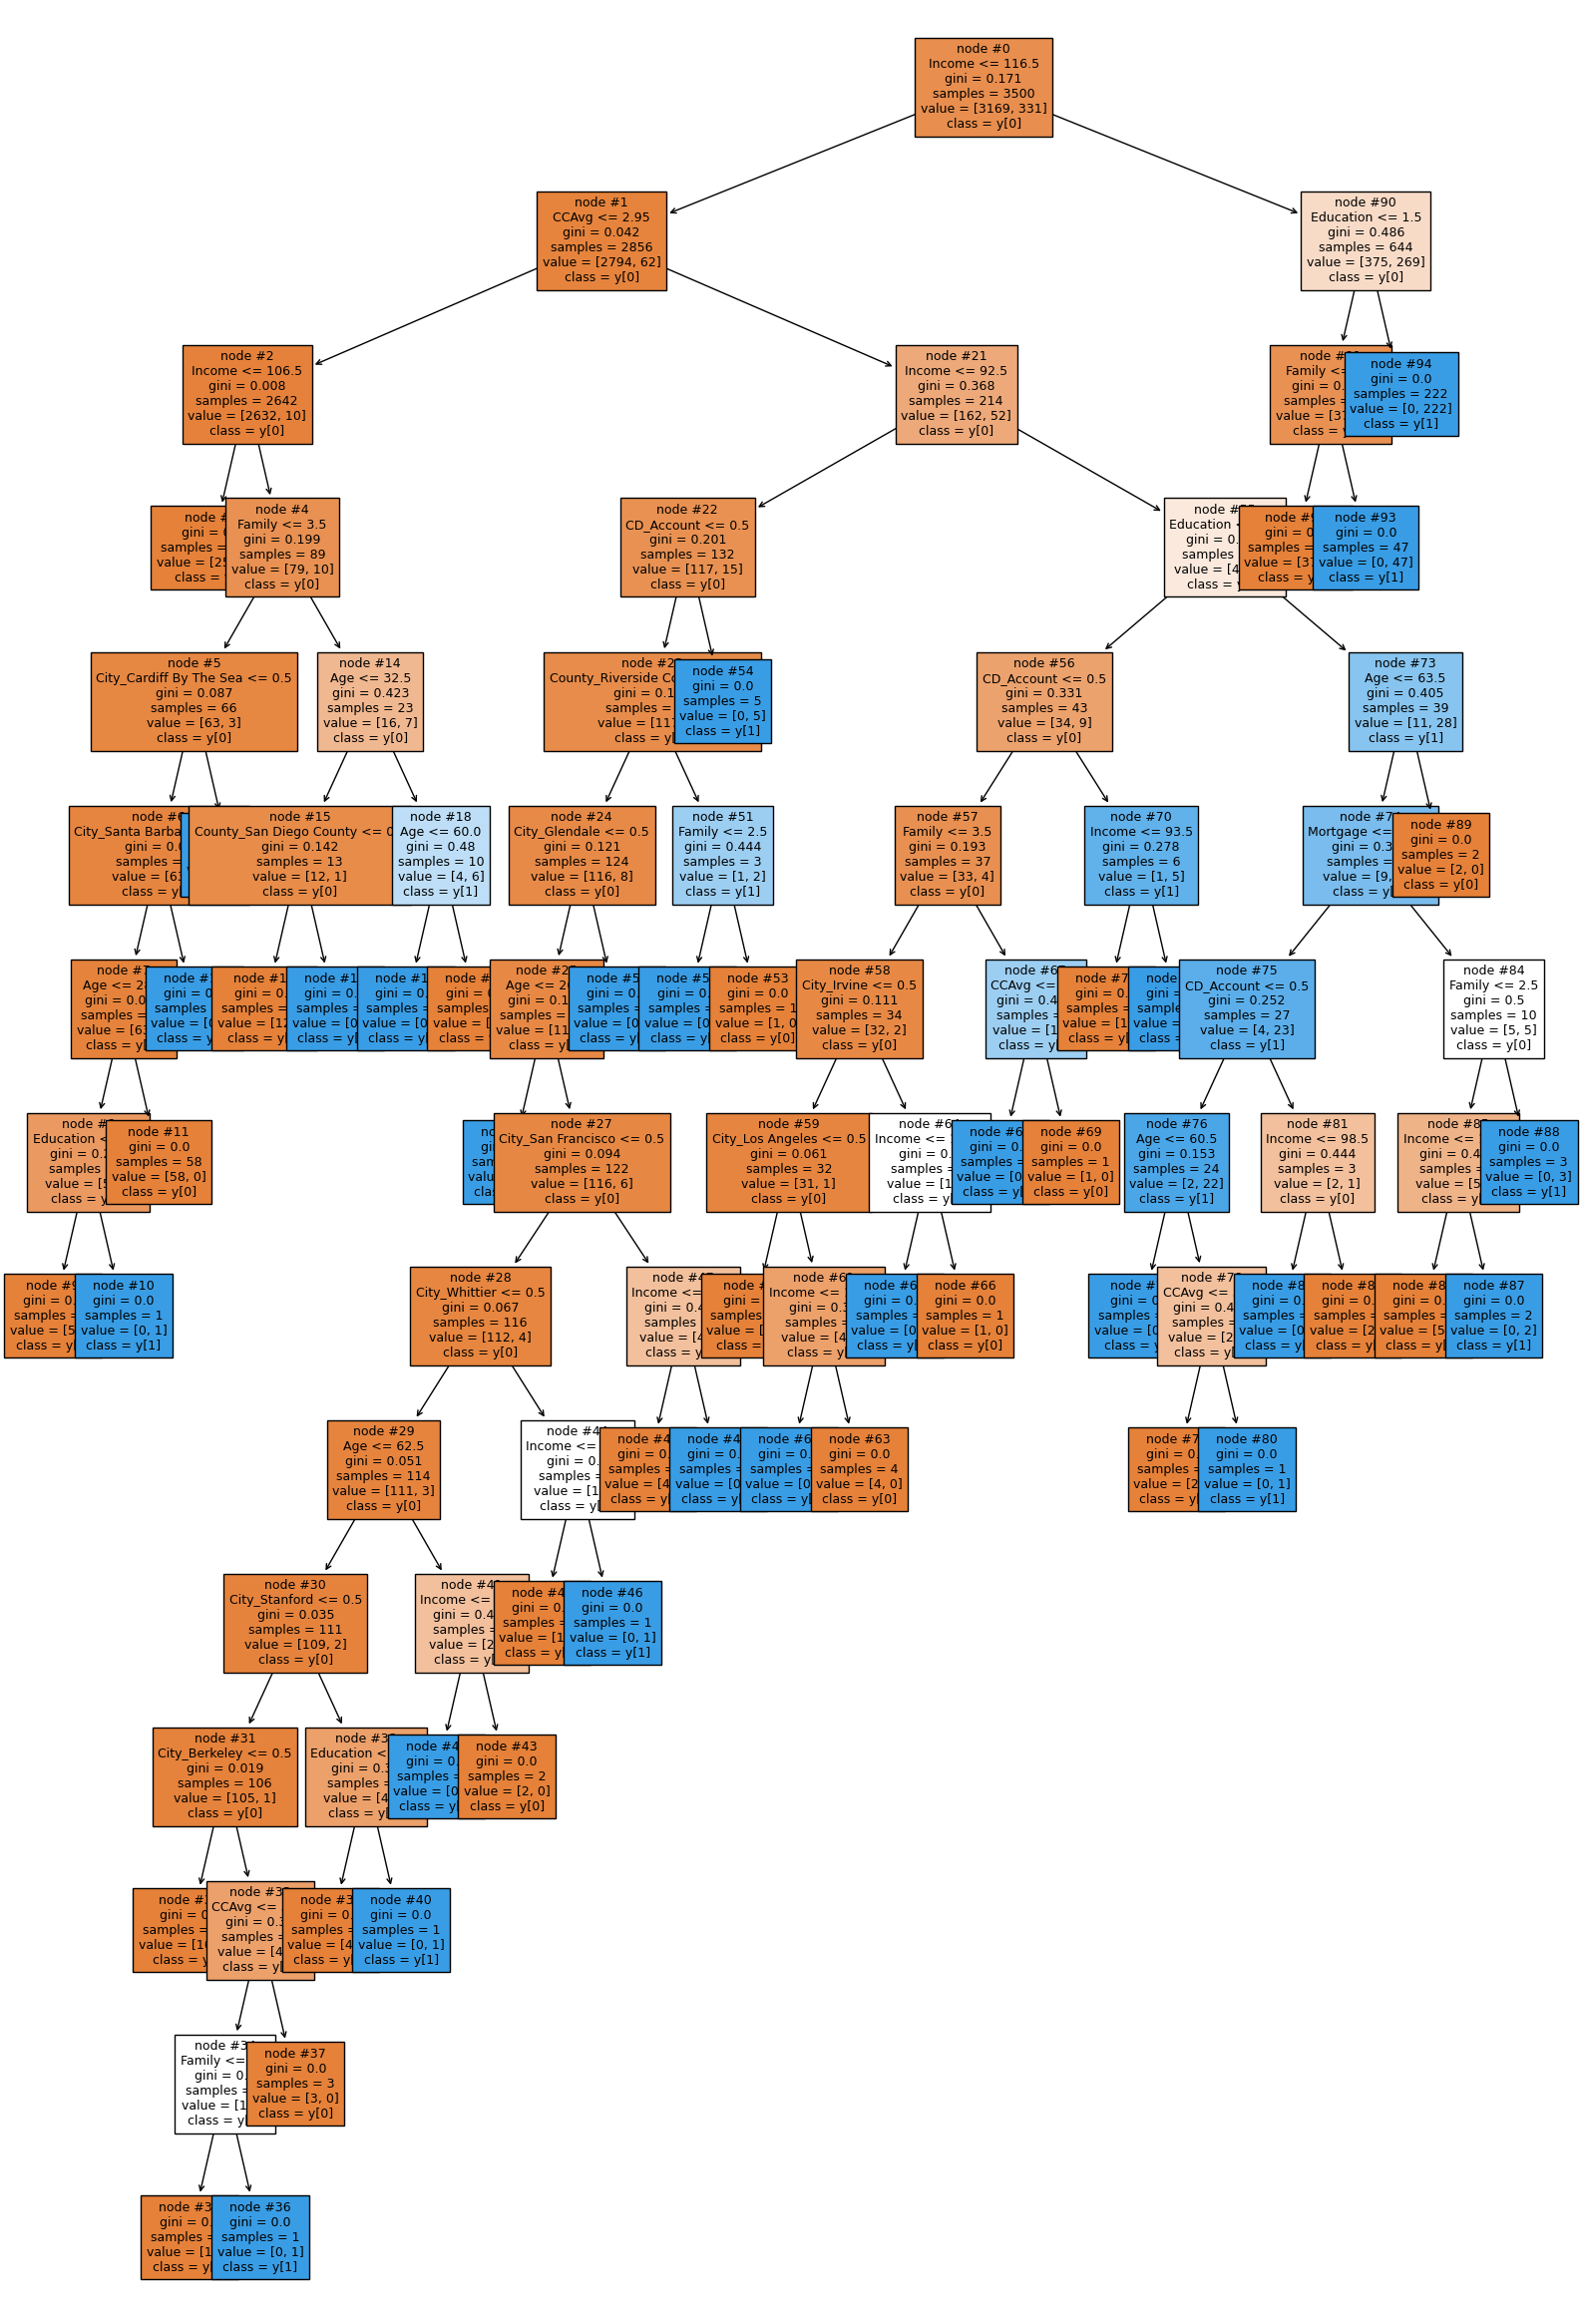

In [78]:
#Visualize tree
plt.figure(figsize=(20,30))
tree.plot_tree(loanTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [79]:
# Text report showing the rules of a decision tree -
print(tree.export_text(loanTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- City_Cardiff By The Sea <= 0.50
|   |   |   |   |   |--- City_Santa Barbara <= 0.50
|   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |--- weights: [58.00, 0.00] class: 0
|   |   |   |   |   |--- City_Santa Barbara >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- City_Cardiff By The Sea >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- County_S

In [80]:
# Show important features ranked, convert to markdown
print (pd.DataFrame(loanTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).to_markdown())

|                               |         Imp |
|:------------------------------|------------:|
| Education                     | 0.406402    |
| Income                        | 0.320267    |
| Family                        | 0.15404     |
| CCAvg                         | 0.0432462   |
| CD_Account                    | 0.0257115   |
| Age                           | 0.0251519   |
| County_Riverside County       | 0.00354378  |
| City_Santa Barbara            | 0.00318351  |
| City_Cardiff By The Sea       | 0.00308704  |
| County_San Diego County       | 0.00308004  |
| Mortgage                      | 0.00301439  |
| City_Glendale                 | 0.00294379  |
| City_San Francisco            | 0.0017001   |
| City_Whittier                 | 0.00147154  |
| City_Irvine                   | 0.00138007  |
| City_Berkeley                 | 0.000635863 |
| City_Stanford                 | 0.000578578 |
| City_Los Angeles              | 0.000563069 |
| City_San Pablo                | 0     

#### Observation
- This is a really complex tree which runs the risk of capturing too much data aka noise and overfitting the model.


### Model Performance Improvement: Decision Tree

#### First do some pruning
- In the first instance we will try a pre-pruning technique and limit the levels of nodes

In [81]:
# pre-prune and refit model
loanTree_prePruned = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
loanTree_prePruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

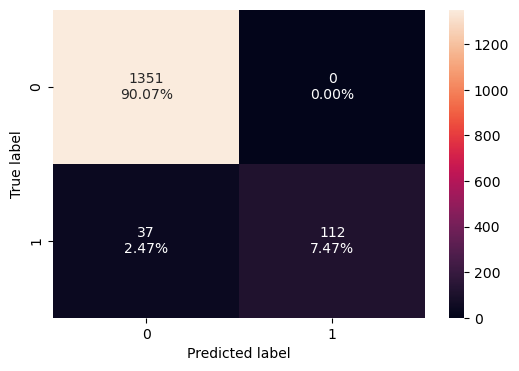

In [82]:
# Confusion matrix with a limit of 3 nodes deep
generate_confusion_matrix(loanTree_prePruned,X_test,y_test)


In [83]:
#variables to later compare
loanTree_prePruned_acc_train = loanTree_prePruned.score(X_train, y_train)
loanTree_prePruned_acc_test = loanTree_prePruned.score(X_test, y_test)
loanTree_prePruned_recall =  get_recall_score(loanTree_prePruned)

# Accuracy on train and test
print("Accuracy on training data -- ",loanTree_prePruned_acc_train)
print("Accuracy on test data -- ",loanTree_prePruned_acc_test)
print("Recall on training data -- ",loanTree_prePruned_recall[0])
print("Recall on test data -- ", loanTree_prePruned_recall[1])



Accuracy on training data --  0.9822857142857143
Accuracy on test data --  0.9753333333333334
Recall on training data --  0.8126888217522659
Recall on test data --  0.7516778523489933


#### Observations
- With the latest pre-pruned model, recall has dropped significantly while accuracy has remained consistent

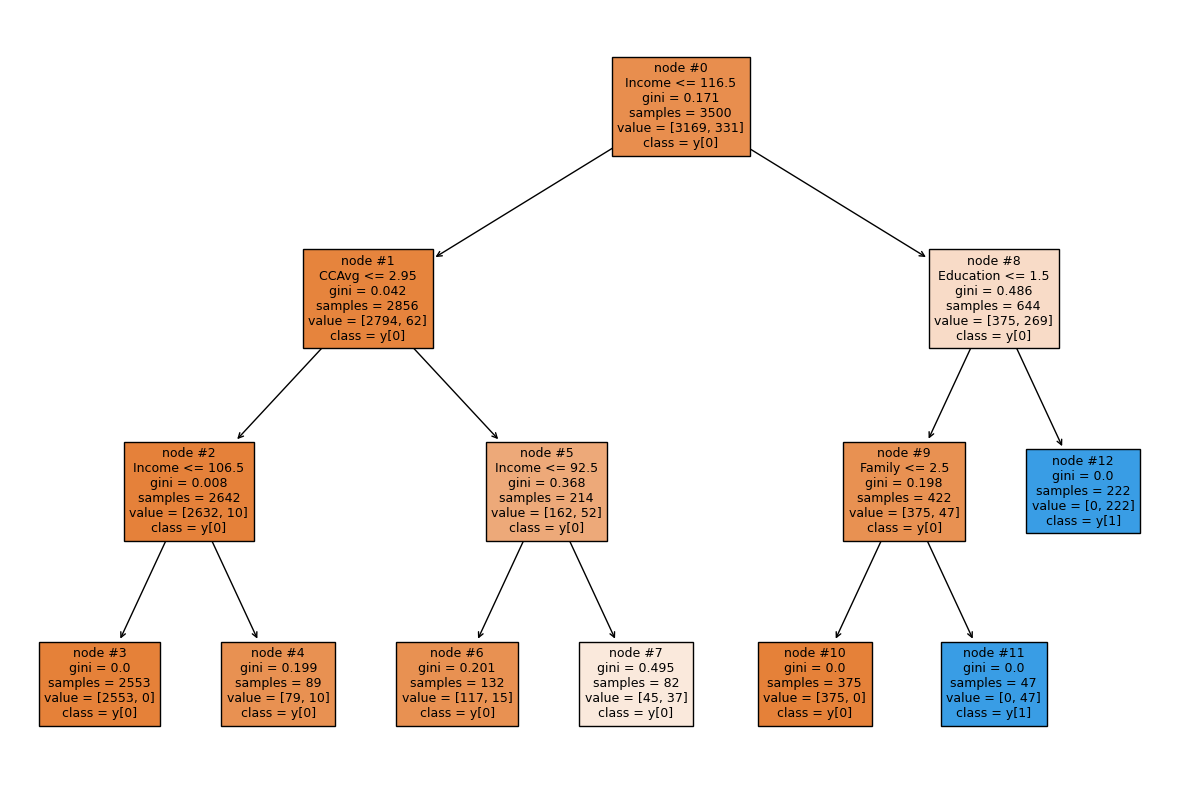

In [84]:
# visualize tree
plt.figure(figsize=(15,10))

tree.plot_tree(loanTree_prePruned,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [85]:
#show feature importance
print (pd.DataFrame(loanTree_prePruned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).to_markdown())

|                               |       Imp |
|:------------------------------|----------:|
| Education                     | 0.446593  |
| Income                        | 0.346997  |
| Family                        | 0.162372  |
| CCAvg                         | 0.0440379 |
| const                         | 0         |
| City_San Leandro              | 0         |
| City_San Rafael               | 0         |
| City_San Pablo                | 0         |
| City_San Mateo                | 0         |
| City_San Marcos               | 0         |
| City_San Luis Rey             | 0         |
| City_San Luis Obispo          | 0         |
| City_San Jose                 | 0         |
| City_San Juan Capistrano      | 0         |
| City_San Juan Bautista        | 0         |
| City_San Ysidro               | 0         |
| City_San Gabriel              | 0         |
| City_San Francisco            | 0         |
| City_San Dimas                | 0         |
| City_San Diego                | 

Observation: Feature importance has reduced to only 4 features given we have not done a tree down far enough to capture the informaiton on other features.

### GridSearch for Hyperparameter tuning of our tree model

In [86]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
loanTree_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
loanTree_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

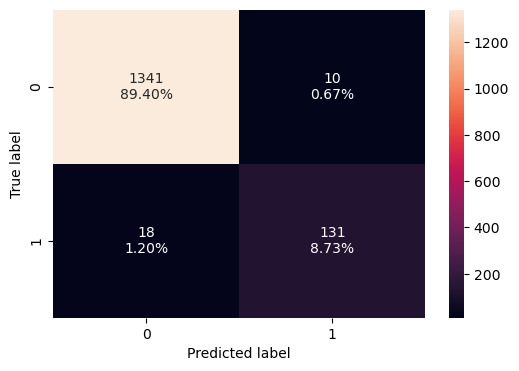

In [87]:
# Confusion matrix for grid search
cm = generate_confusion_matrix(loanTree_grid,X_test,y_test)




Observation: see a bit lower Type 2 error rate which is good indication of improvement

In [88]:
#variables to later compare
loanTree_grid_acc_train = loanTree_grid.score(X_train, y_train)
loanTree_grid_acc_test = loanTree_grid.score(X_test, y_test)
loanTree_grid_recall =  get_recall_score(loanTree_grid)

# Accuracy on train and test
print("Accuracy on training data -- ",loanTree_grid_acc_train)
print("Accuracy on test data -- ",loanTree_grid_acc_test)
print("Recall on training data -- ",loanTree_grid_recall[0])
print("Recall on test data -- ", loanTree_grid_recall[1])


Accuracy on training data --  0.9897142857142858
Accuracy on test data --  0.9813333333333333
Recall on training data --  0.9274924471299094
Recall on test data --  0.8791946308724832


Observation: The recall has improved to a high level and the FN is also quite low which will limit the loss of opportunity.

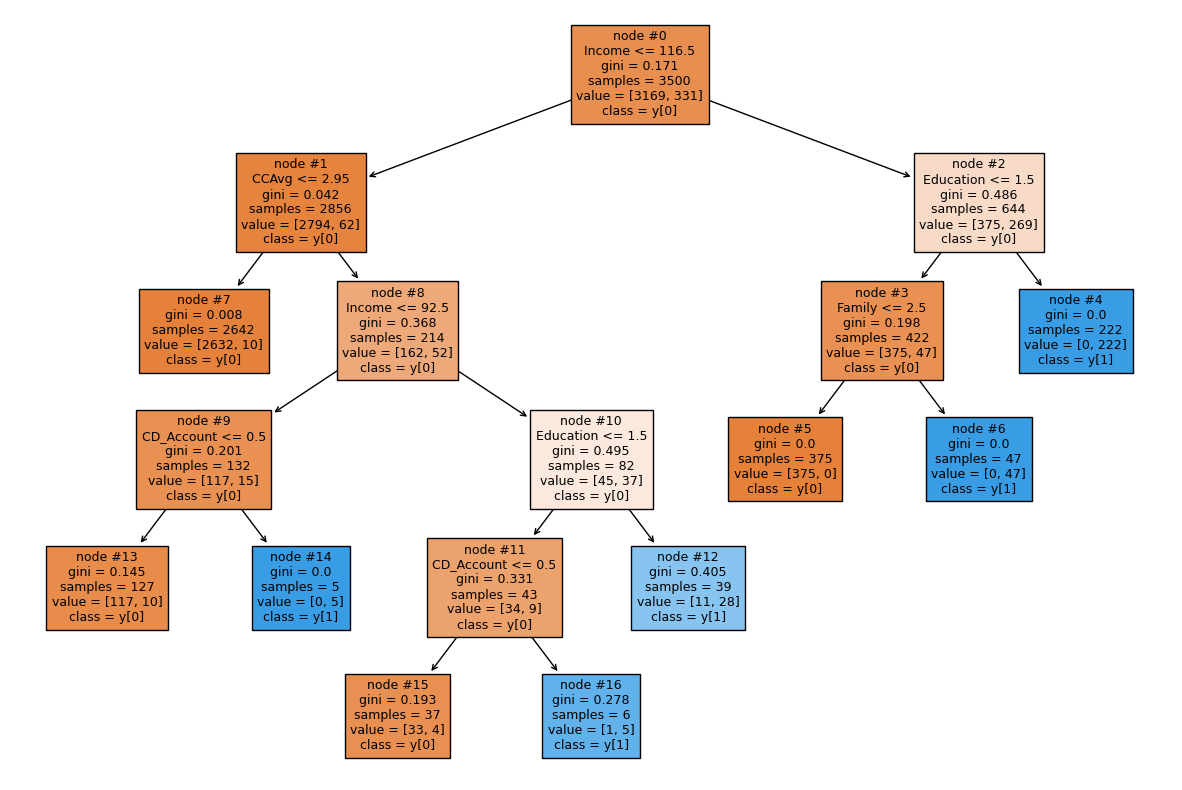

In [89]:
#visualize the decision tree into a tree plot
plt.figure(figsize=(15,10))
tree.plot_tree(loanTree_grid,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [90]:
# Printing a text report that defines the tree in text format
print(tree.export_text(loanTree_grid,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [91]:
#Printing the Feature importance
print (pd.DataFrame(loanTree_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).to_markdown())

|                               |       Imp |
|:------------------------------|----------:|
| Education                     | 0.447999  |
| Income                        | 0.328713  |
| Family                        | 0.155711  |
| CCAvg                         | 0.0422313 |
| CD_Account                    | 0.0253454 |
| const                         | 0         |
| City_San Leandro              | 0         |
| City_San Rafael               | 0         |
| City_San Pablo                | 0         |
| City_San Mateo                | 0         |
| City_San Marcos               | 0         |
| City_San Luis Rey             | 0         |
| City_San Luis Obispo          | 0         |
| City_San Jose                 | 0         |
| City_San Juan Capistrano      | 0         |
| City_San Juan Bautista        | 0         |
| City_San Ysidro               | 0         |
| City_San Gabriel              | 0         |
| City_San Francisco            | 0         |
| City_San Dimas                | 

#### Observations
- Education continue to be the most important feature then Income, Family, CCAvg and CD_Account
- An additonal feature added from previous pre-pruned model

## Cost Complexity Pruning

In [92]:
# Setup decision classifier
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [93]:
#show alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000189,0.000566
2,0.000269,0.001642
3,0.000273,0.003283
4,0.000281,0.003845
5,0.000381,0.004226
6,0.000381,0.004607
7,0.000381,0.004988
8,0.000381,0.005369
9,0.000476,0.005845


#### Observation
- This is the result of the decsion tree classifier showing effective alpha from smallest to largest with associated impurity of leaf at each step.

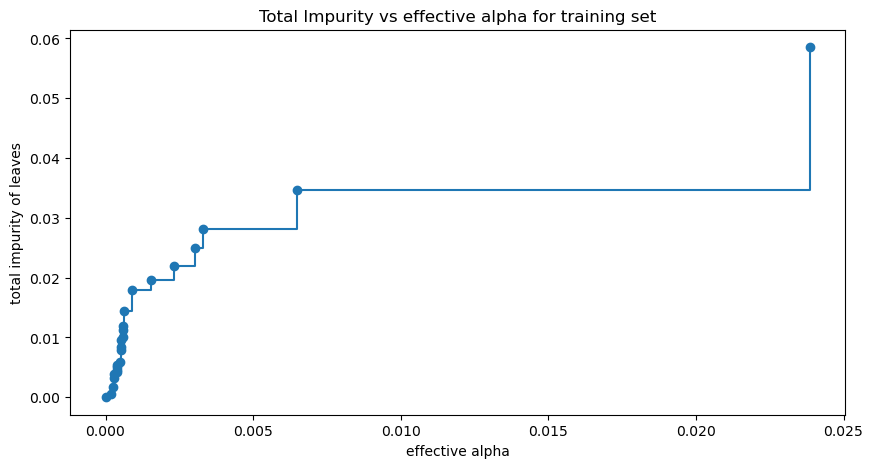

In [94]:
# PLot Impurity vs alpha
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Observation: can see that as alpha increase impurity increases very fast then levels off as we generalize better, then increases again. It makes sense as we have less features 

In [95]:
# Setup decision classifiers and fit model with 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


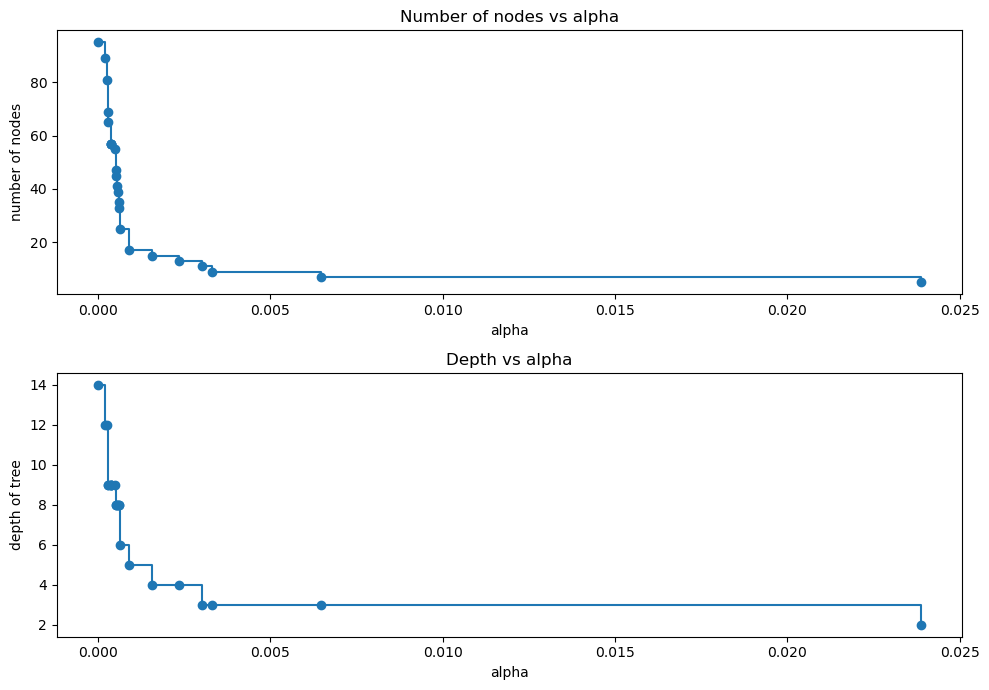

In [96]:
# Plot nodes and depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Observation: As alpha increases the nodes and depths of the tree decreases as well as show above. 

In [97]:
# define classifier scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

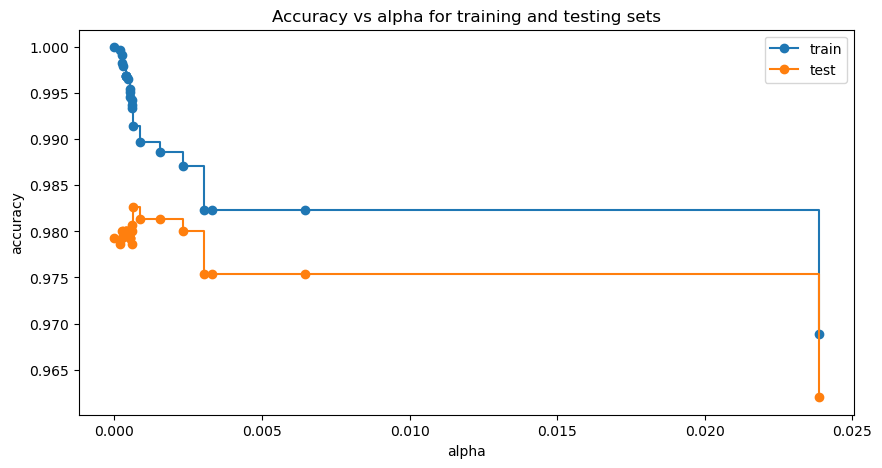

In [98]:
# PLot accuracy vs alpha
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Observation: 
- WIth the training datawe can see 100% accuracy at 0 alpha meaning it's overfit but as alpha goes down the model is generalizing better
- As alpha increases the nodes and depths of the tree decreases because we are pruning.
- The test data actually increases in accuracy as we prune at first then drops a bit and holds steady


In [99]:
#prepare and display accuracy metrics
index_ar_model = np.argmax(test_scores)
ar_model = clfs[index_ar_model]
print(ar_model)
print("")
print('Training accuracy of ar_model --- ',ar_model.score(X_train, y_train))
print('Test accuracy of ar_model --- ',ar_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)

Training accuracy of ar_model ---  0.9914285714285714
Test accuracy of ar_model ---  0.9826666666666667


Observation: 
- Accuracy is very high but in our case we are most interested in the recall.

#### Calculate Recall

In [100]:
# calculate recall on train data
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [101]:
# calculate recall on test data
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

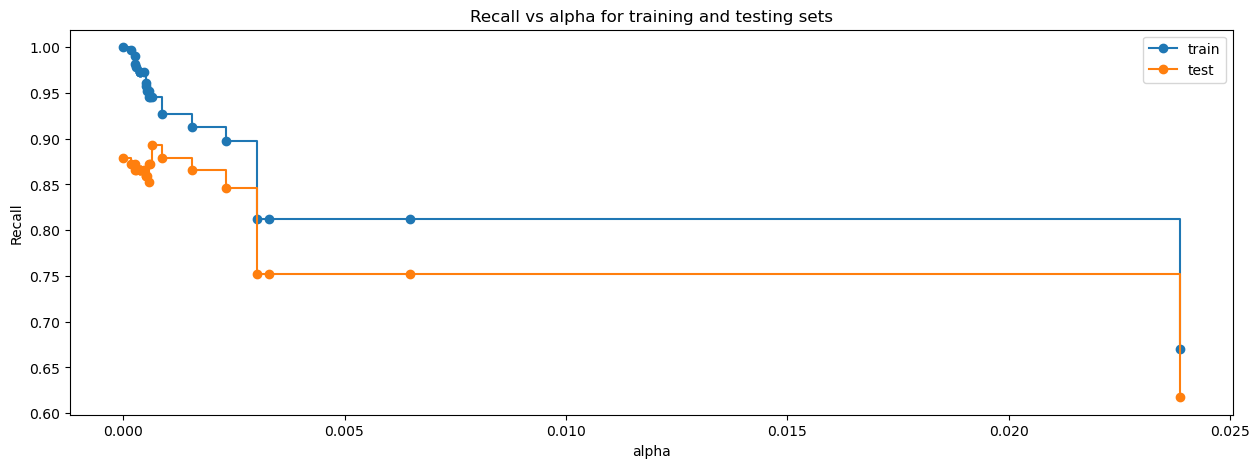

In [102]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Observation: 
- Recall on the test set follows a similar pattern to accuracy, it increases, a bit, then decreases and then holds steady at 75% (it's generalizing) as alpha increases

In [103]:
# creating the model where we get highest train and test recall
index_ar_model = np.argmax(recall_test)
ar_model = clfs[index_ar_model]
print(ar_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


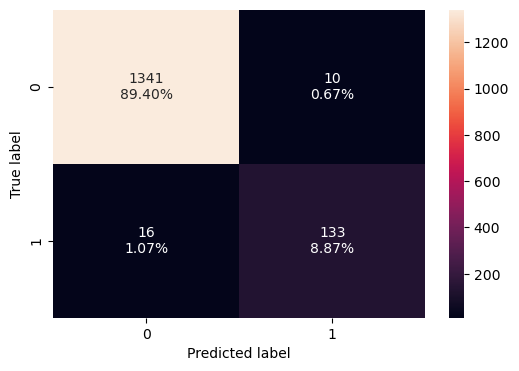

In [104]:
# Confusion matrix for grid search
generate_confusion_matrix(ar_model,X_test,y_test)


In [105]:
#variables to later compare
ar_model_acc_train = ar_model.score(X_train, y_train)
ar_model_acc_test = ar_model.score(X_test, y_test)
ar_model_recall =  get_recall_score(ar_model)

# Accuracy on train and test
print("Accuracy on training set -- ",ar_model_acc_train)
print("Accuracy on test set -- ",ar_model_acc_test)
print("Recall on training set -- ",ar_model_recall[0])
print("Recall on test set -- ", ar_model_recall[1])


Accuracy on training set --  0.9914285714285714
Accuracy on test set --  0.9826666666666667
Recall on training set --  0.945619335347432
Recall on test set --  0.8926174496644296


#### Observation 
- So far this seems to be the best recall I am getting in all models using test data. The accuracy is very high.
- False negatives are minimal at 1%

#### Visualize Decision tree

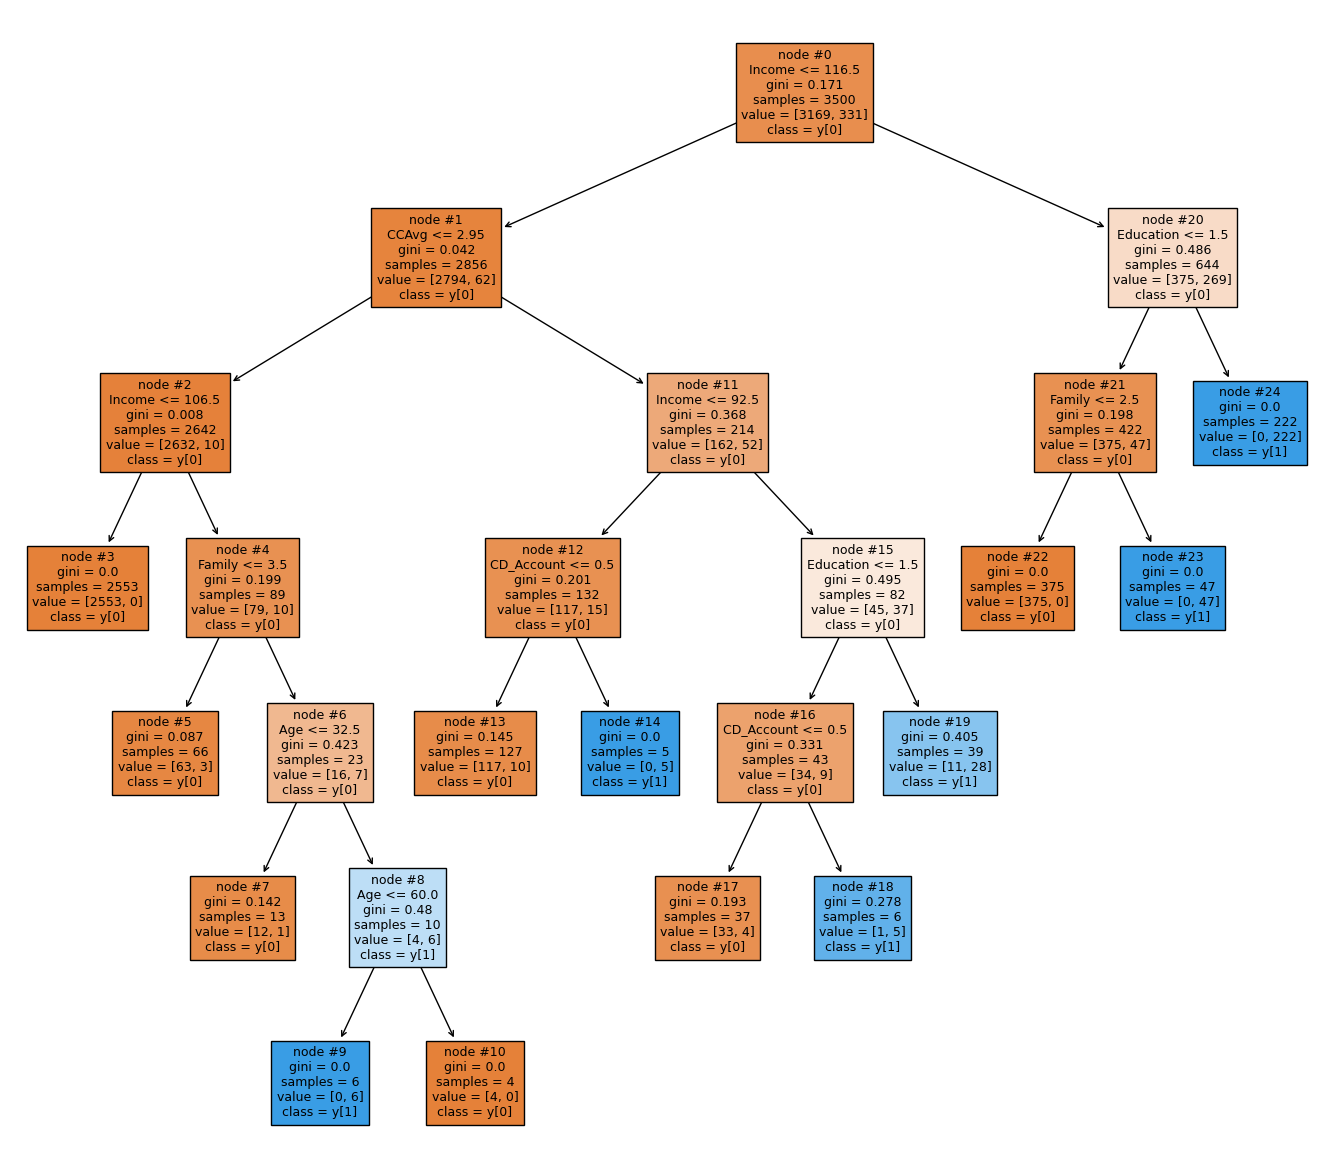

In [106]:
#visualizing the tree with a tree plot
plt.figure(figsize=(17,15))
tree.plot_tree(ar_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [107]:
# Text report showing the rules of a decision tree -
print(tree.export_text(ar_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   | 

In [108]:
#printing the features and the order of importance
print (pd.DataFrame(ar_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).to_markdown())

|                               |       Imp |
|:------------------------------|----------:|
| Education                     | 0.437917  |
| Income                        | 0.325272  |
| Family                        | 0.156373  |
| CCAvg                         | 0.0412808 |
| CD_Account                    | 0.024775  |
| Age                           | 0.0143823 |
| const                         | 0         |
| City_San Leandro              | 0         |
| City_San Rafael               | 0         |
| City_San Pablo                | 0         |
| City_San Mateo                | 0         |
| City_San Marcos               | 0         |
| City_San Luis Rey             | 0         |
| City_San Luis Obispo          | 0         |
| City_San Gabriel              | 0         |
| City_San Juan Capistrano      | 0         |
| City_San Juan Bautista        | 0         |
| City_San Jose                 | 0         |
| City_San Ysidro               | 0         |
| City_San Francisco            | 

#### Observations
- Top features are Education, Income, Family, CCAvg, CD_Account and Age in this order.

## Model Comparison and Final Model Selection

In [109]:
# code that setsup dataframe that will show results of all models to allow for a selection
comparison_frame = pd.DataFrame(
    {
        'Model':
            [
                'Initial decision tree model',
                'Decision tree with restricted maximum depth',
                'Decision tree with hyper-parameter tuning',
                'Decision tree with post-pruning'
            ], 
            'Train_Recall':
            [
                loanTree_recall[0],
                loanTree_prePruned_recall[0],
                loanTree_grid_recall[0],
                ar_model_recall[0]
            ], 
            'Test_Recall':
            [
                loanTree_recall[0],
                loanTree_prePruned_recall[1],
                loanTree_grid_recall[1],
                ar_model_recall[1]
            ]
    }) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000000,1.000000
1,Decision tree with restricted maximum depth,0.812689,0.751678
2,Decision tree with hyper-parameter tuning,0.927492,0.879195
3,Decision tree with post-pruning,0.945619,0.892617


#### Observations
- Overall it's clear the best performing model (we will not use the iniatial model as it is far too complex and is overfit) is the desision tree with post pruning using the Cost Complexity approach. the Test recall if 89% is the best of the remaining 3 methods. 
methods.
- Top features are Education, Income, Family, CCAvg, CD_Account and Age in this order.

## Actionable Insights and Business Recommendations


#### Based on the data analysis done and the logistic regression and decision tree modeling.

- Recommendation 1: It's clear that higher education does have an impact on whether someone purchases a loan, the education was the feature pointed out with the highest importance in independent variables. I would target customers that have educations levels of graduate level at least a bit more than undergrads. 

- Recommendation 2: Target customers that have higher incomes, our modeling shows income as the second most important feature. In our data analysis it's also easy to see income being an higher in the personal loan takers.

- Recommendation 3: Target customers that have 2 or more family members in houshold, our modeling shows family size as the third most important feature. In our data analysis it's also shown that personal loan takers have 2 ore more family members in the top 3 quartiles of data.


___